# Import Dataset

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

#import dataframes
SDI_2019 = pd.read_excel('/Users/noira/Desktop/sdi/web_scrap_SDI_2019.xlsx')[['Country', 'SDI']]
BTI_2018 = pd.read_excel('/Users/noira/Desktop/bti/BTI 2018.xlsx')
BTI_2016 = pd.read_excel('/Users/noira/Desktop/bti/BTI 2016.xlsx')
BTI_2014 = pd.read_excel('/Users/noira/Desktop/bti/BTI 2014.xlsx')
BTI_2012 = pd.read_excel('/Users/noira/Desktop/bti/BTI 2012.xlsx')
BTI_2010 = pd.read_excel('/Users/noira/Desktop/bti/BTI 2010.xlsx')

#add a year column for later concat
BTI_2018['Year'] = 2018
BTI_2016['Year'] = 2016
BTI_2014['Year'] = 2014
BTI_2012['Year'] = 2012
BTI_2010['Year'] = 2010

#Concat the years

BTI_all_years = pd.concat([BTI_2018, BTI_2016, BTI_2014, BTI_2012, BTI_2010], join = 'inner')

#Rename the first column
column_list = BTI_all_years.columns.tolist()
BTI_all_years = BTI_all_years.rename(columns = {column_list[0]: 'Country', column_list[1]: 'Region'})

#Merge with SDI
BTI_all_years_SDI = pd.merge(BTI_all_years, SDI_2019, left_on = 'Country', right_on = 'Country')
BTI_all_years_SDI

,Country,Region,Ranking Status Index,S | Status Index,Ranking Democracy Status,SI | Democracy Status,Q1 | Stateness,Q1.1 | Monopoly on the use of force,Q1.2 | State identity,Q1.3 | No interference of religious dogmas,...,Category.3,.3,Q13 | Level of Difficulty.1,Category.4,.4,GII | Governance Performance.1,Category.5,.5,Year,SDI
0,Afghanistan,7,121,2.954762,114,3.016667,3.75,2,6,3,...,4,Weak,9,1,Massive,4.116667,4,Flawed,2018,0.551
1,Afghanistan,7,120,2.954762,117,3.016667,3.75,3,6,3,...,4,Weak,9.1,1,Massive,3.95,4,Flawed,2016,0.551
2,Afghanistan,7,122,2.965476,120,2.966667,3.5,3,6,3,...,4,Weak,9.1,1,Massive,3.366667,4,Flawed,2014,0.551
3,Afghanistan,7,124,2.821429,124,2.75,3.25,2,6,3,...,4,Weak,9.7,1,Massive,3.4,4,Flawed,2012,0.551
4,Afghanistan,7,124,2.810714,123,2.8,2.75,1,6,3,...,4,Weak,9.8,1,Massive,3.7,4,Flawed,2010,0.551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Zimbabwe,5,113,3.327381,92,3.833333,7,9,7,8,...,5,Failed,6.5,2,Substantial,2.566667,5,Poor,2018,0.615
596,Zimbabwe,5,107,3.832143,87,4.2,7.25,8,7,9,...,5,Failed,6.6,2,Substantial,2.933333,5,Poor,2016,0.615
597,Zimbabwe,5,108,3.905952,88,4.383333,7.25,8,7,9,...,4,Weak,6.6,2,Substantial,3.466667,4,Flawed,2014,0.615
598,Zimbabwe,5,115,3.567857,87,4.35,7.5,7,9,9,...,5,Failed,7.1,2,Substantial,2.316667,5,Poor,2012,0.615


# Data Cleaning!

In [4]:
columns_series = pd.Series(BTI_all_years.columns)

# Define the regex pattern
pattern = r'Q(1[0-7]|[1-9])\s*\|\s*'


# First, find the column names that match the pattern
matching_columns = BTI_all_years_SDI.columns[BTI_all_years_SDI.columns.str.contains(pattern)]

# Create a list of columns to keep, explicitly including 'Year' and 'Country'
columns_to_keep = ['Year', 'Country', 'Region', 'SDI'] + matching_columns.tolist()
# Filter the DataFrame to keep only the desired columns
important_indices = BTI_all_years_SDI[columns_to_keep]
important_indices

/var/folders/c4/nh07n52n3zb_f772q902yfv00000gn/T/ipykernel_18224/398747922.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  matching_columns = BTI_all_years_SDI.columns[BTI_all_years_SDI.columns.str.contains(pattern)]


,Year,Country,Region,SDI,Q1 | Stateness,Q2 | Political Participation,Q3 | Rule of Law,Q4 | Stability of Democratic Institutions,Q5 | Political and Social Integration,Q6 | Level of Socioeconomic Development,...,Q9 | Private Property,Q10 | Welfare Regime,Q11 | Economic Performance,Q12 | Sustainability,Q13 | Level of Difficulty,Q14 | Steering Capability,Q15 | Resource Efficiency,Q16 | Consensus-Building,Q17 | International Cooperation,Q13 | Level of Difficulty.1
0,2018,Afghanistan,7,0.551,3.75,3.5,2.5,3,2.333333,1,...,3.5,2.5,4,2.5,8.979167,4.333333,2.666667,3.8,5.666667,9
1,2016,Afghanistan,7,0.551,3.75,3.5,2.5,3,2.333333,1,...,3,2,4,2.5,9.145833,4,2.666667,3.8,5.333333,9.1
2,2014,Afghanistan,7,0.551,3.5,3.25,2.75,3,2.333333,1,...,3.5,1.5,5,2,9.145833,3,2,3.8,4.666667,9.1
3,2012,Afghanistan,7,0.551,3.25,3.25,2.25,3,2,1,...,3.5,1.5,5,1.5,9.708333,3,2,3.6,5,9.7
4,2010,Afghanistan,7,0.551,2.75,4,2.25,3,2,1,...,3.5,1.5,5,1.5,9.75,3,2,3.8,6,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2018,Zimbabwe,5,0.615,7,3.25,2.75,2.5,3.666667,2,...,2.5,3,2,3.5,6.520833,2.333333,2,2.6,3.333333,6.5
596,2016,Zimbabwe,5,0.615,7.25,3.5,3.25,3,4,3,...,2.5,3,3,3,6.625,2.666667,2.333333,3.4,3.333333,6.6
597,2014,Zimbabwe,5,0.615,7.25,3.5,3.5,3,4.666667,3,...,2.5,3,3,3.5,6.604167,3.333333,3.333333,3.2,4,6.6
598,2012,Zimbabwe,5,0.615,7.5,3.25,3,3,5,3,...,2.5,2.5,2,3.5,7.125,2.333333,1.666667,2.6,2.666667,7.1


In [5]:
#Deal wth null values

In [6]:
#Check that granularity is correct
important_indices.loc[important_indices['Country'] == 'Zimbabwe']
#Create an array of column names
important_indices_array = important_indices.columns[3:-1]

# Regression!

In [7]:
#sort by region
important_indices = important_indices.sort_values(by = 'Region')
important_indices

,Year,Country,Region,SDI,Q1 | Stateness,Q2 | Political Participation,Q3 | Rule of Law,Q4 | Stability of Democratic Institutions,Q5 | Political and Social Integration,Q6 | Level of Socioeconomic Development,...,Q9 | Private Property,Q10 | Welfare Regime,Q11 | Economic Performance,Q12 | Sustainability,Q13 | Level of Difficulty,Q14 | Steering Capability,Q15 | Resource Efficiency,Q16 | Consensus-Building,Q17 | International Cooperation,Q13 | Level of Difficulty.1
459,2010,Romania,1,0.692,9.25,9.25,8.25,8.5,7.25,7,...,9,7,8,7,3.208333,7,6.333333,8,8.333333,3.2
145,2018,Czech Republic,1,0.399,10,10,9.25,9,8.75,10,...,10,9.5,9,9,1.0625,8,8,9.4,9.666667,1.1
146,2016,Czech Republic,1,0.399,10,9.75,9.25,9.5,8.75,10,...,10,9.5,8,8.5,1.0625,7.666667,7.666667,9.2,9.666667,1.1
147,2014,Czech Republic,1,0.399,10,10,9.25,10,8.75,10,...,10,9.5,8,9,1.229167,7.333333,7,9,9.333333,1.2
148,2012,Czech Republic,1,0.399,10,10,9.25,10,9,10,...,10,9.5,9,9,1.229167,7.333333,7,9,9.333333,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2010,Indonesia,7,0.768,6.75,7.75,6.75,7,6.75,6,...,6,5,6,4.5,5.541667,6.333333,5.333333,6.4,8,5.5
285,2018,Laos,7,0.658,8.25,1,2,1,2.333333,4,...,4,4,7,3,6.479167,4,3.333333,3.2,6.333333,6.5
286,2016,Laos,7,0.658,8.5,1,2,1,2,4,...,4,4,7,3,6.791667,3.333333,3,3.2,6.333333,6.8
238,2012,India,7,0.696,8.25,9.5,7.5,8.5,7.25,4,...,7,4.5,10,5.5,5.6875,7,6,8.5,8,5.7


## Regress each BTI idex on SDI for every region

In [8]:
#drop the non-numeric rows.
numeric_columns = important_indices.columns.difference(['Region', 'Year', 'Country'])
important_indices[numeric_columns] = important_indices[numeric_columns].apply(pd.to_numeric, errors='coerce')
important_indices.dropna(subset=numeric_columns, inplace=True)

BTI_SDI_all_year_lin_corr = {}

# List of regions
regions = [1, 2, 3, 4, 5, 6, 7]

# Exclude 'SDI', 'Region', 'Year', 'Country' from the analysis
important_indices_array = [col for col in important_indices.columns if col not in ['SDI', 'Region', 'Year', 'Country']]

for region in regions:
    # Filter the DataFrame for the current region
    group_country = important_indices.loc[important_indices['Region'] == region]
    #plt.scatter(x = group_country[numeric_columns], y = group_country['SDI'], hue = 'Region')
    
    # Initialize a dictionary for this region
    BTI_SDI_all_year_lin_corr[region] = {}
    
    for index in important_indices_array:
        X = group_country[[index]]
        y = group_country['SDI']
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        
        # Create and train the model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Make predictions and evaluate the model
        predictions = model.predict(X_test)
        r_squared = r2_score(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)
        rmse = sqrt(mse)
        
        # Store the results in the dictionary
        BTI_SDI_all_year_lin_corr[region][index] = {'R_squared': r_squared, 'RMSE': rmse}


BTI_SDI_all_year_lin_corr    

{1: {'  Q1 | Stateness': {'R_squared': -0.19790441034458728,
   'RMSE': 0.19957847445189145},
  '  Q2 | Political Participation': {'R_squared': 0.30116482883211315,
   'RMSE': 0.1524368598138595},
  '  Q3 | Rule of Law': {'R_squared': 0.23865542710581666,
   'RMSE': 0.15910844995501466},
  '  Q4 | Stability of Democratic Institutions': {'R_squared': 0.3871540698565511,
   'RMSE': 0.14275070765862083},
  '  Q5 | Political and Social Integration': {'R_squared': 0.18403717730613667,
   'RMSE': 0.1647167643438474},
  '  Q6 | Level of Socioeconomic Development': {'R_squared': 0.0049504249026844915,
   'RMSE': 0.18189676529159016},
  '  Q7 | Organization of the Market and Competition': {'R_squared': 0.058432012202192296,
   'RMSE': 0.1769409924946292},
  '  Q8 | Monetary and Fiscal Stability': {'R_squared': 0.3790144704931697,
   'RMSE': 0.1436955624960381},
  '  Q9 | Private Property': {'R_squared': 0.05612066433013829,
   'RMSE': 0.17715803550934967},
  '  Q10 | Welfare Regime': {'R_square

In [9]:
filtered_BTI_SDI_results = {}

for region, indices in BTI_SDI_all_year_lin_corr.items():
    filtered_BTI_SDI_results[region] = {}
    for index, metrics in indices.items():
        r_squared = metrics['R_squared']
        # Apply the filtering conditions
        if r_squared > 0.3 or r_squared < 0:
            filtered_BTI_SDI_results[region][index] = metrics

# Now, 'filtered_BTI_SDI_results' contains only the indices that meet the specified R-squared criteria for each region.
filtered_BTI_SDI_results

{1: {'  Q1 | Stateness': {'R_squared': -0.19790441034458728,
   'RMSE': 0.19957847445189145},
  '  Q2 | Political Participation': {'R_squared': 0.30116482883211315,
   'RMSE': 0.1524368598138595},
  '  Q4 | Stability of Democratic Institutions': {'R_squared': 0.3871540698565511,
   'RMSE': 0.14275070765862083},
  '  Q8 | Monetary and Fiscal Stability': {'R_squared': 0.3790144704931697,
   'RMSE': 0.1436955624960381},
  '  Q12 | Sustainability': {'R_squared': -0.042841509883331685,
   'RMSE': 0.18621376092757233},
  '  Q14 | Steering Capability': {'R_squared': 0.3191957000222233,
   'RMSE': 0.15045747243235563},
  '  Q15 | Resource Efficiency': {'R_squared': 0.49669343269789157,
   'RMSE': 0.12936563222751668},
  '  Q17 | International Cooperation': {'R_squared': 0.37078078623844823,
   'RMSE': 0.14464505952694653}},
 2: {'  Q2 | Political Participation': {'R_squared': -0.04910398798636417,
   'RMSE': 0.0881002919751279},
  '  Q3 | Rule of Law': {'R_squared': -0.03354445140790485,
   'R

# Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


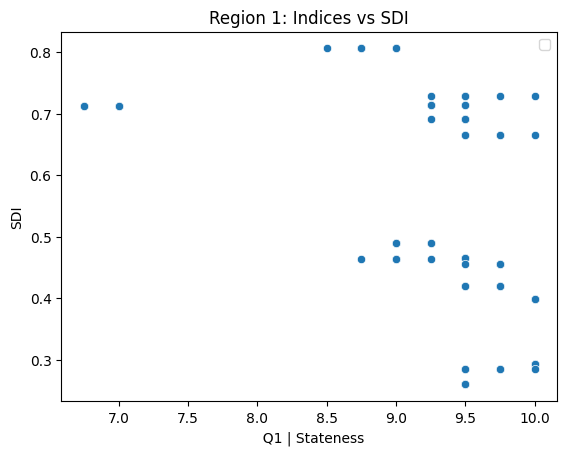

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


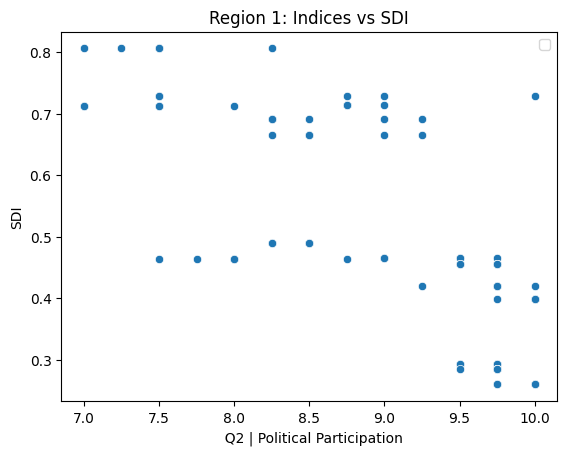

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


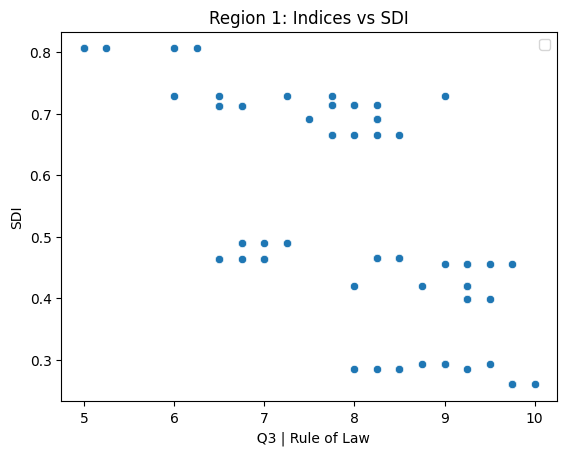

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


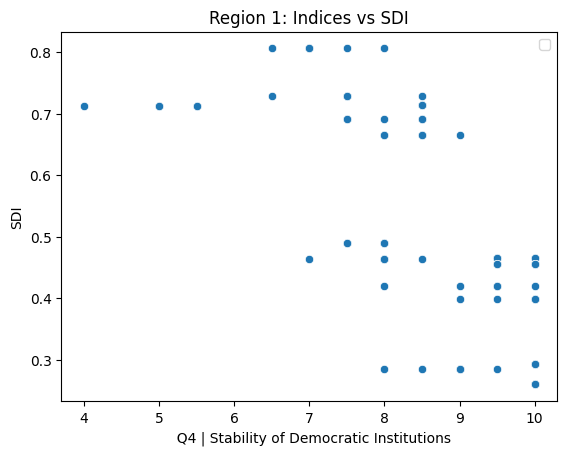

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


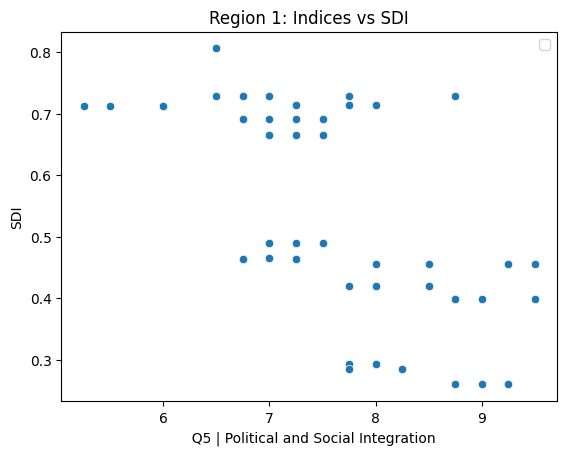

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


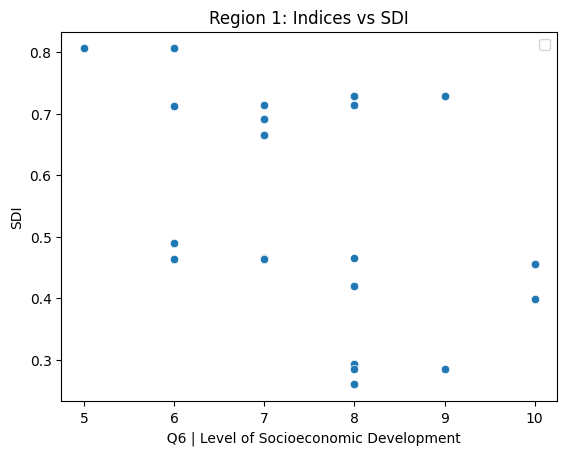

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


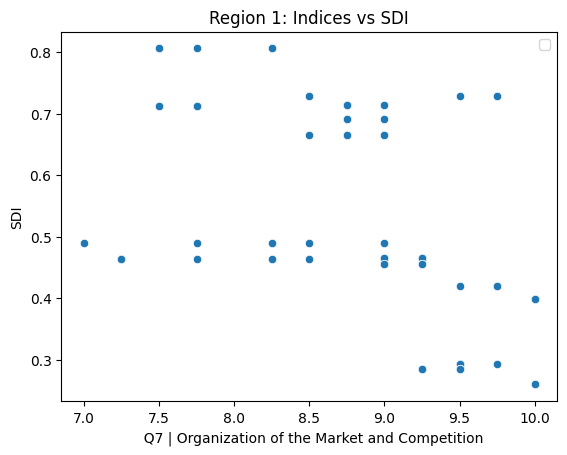

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


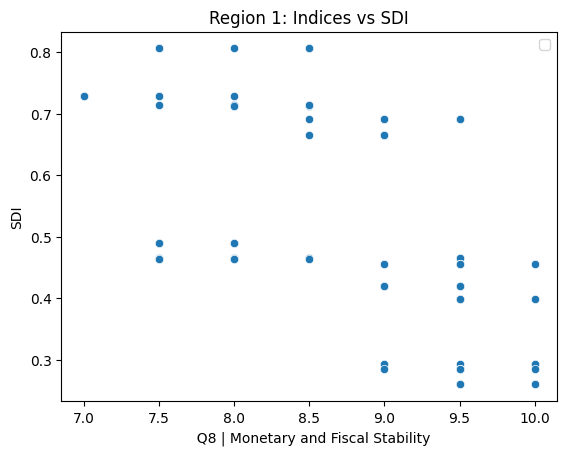

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


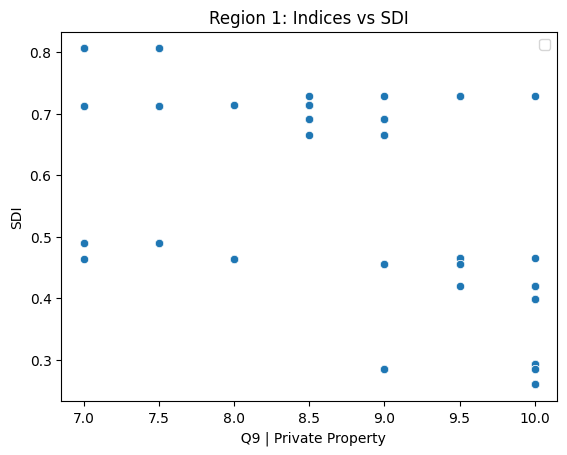

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


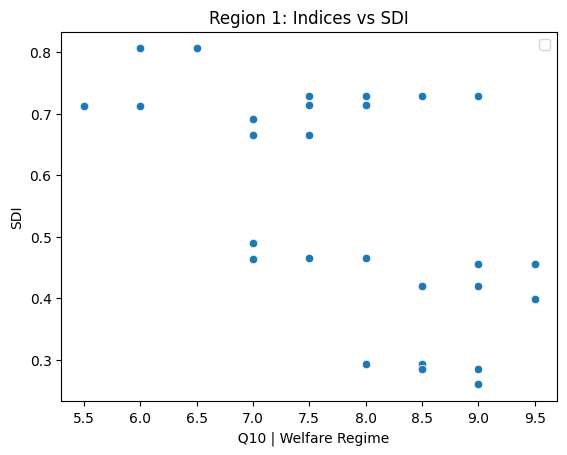

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


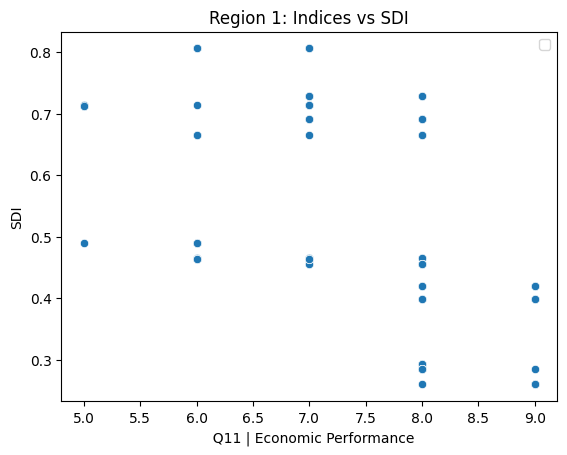

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


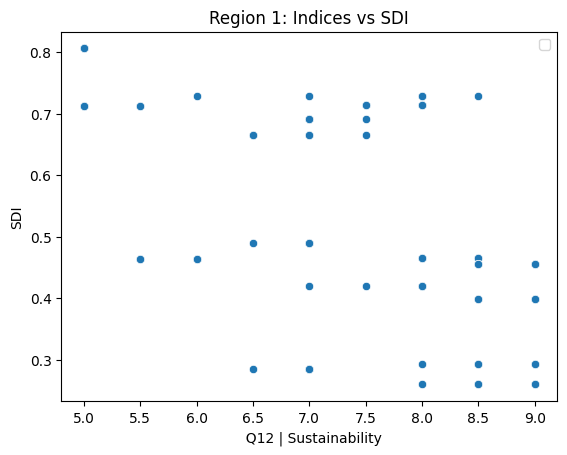

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


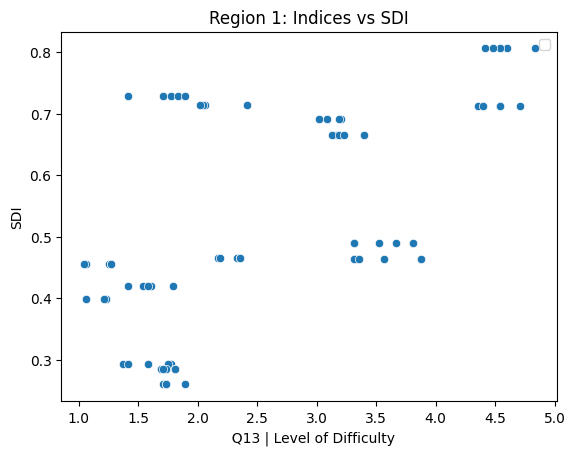

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


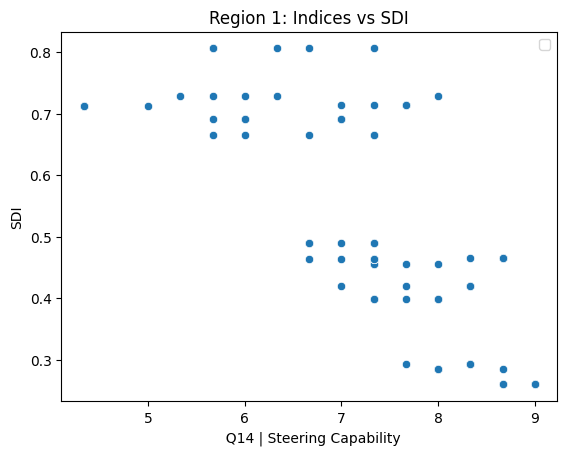

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


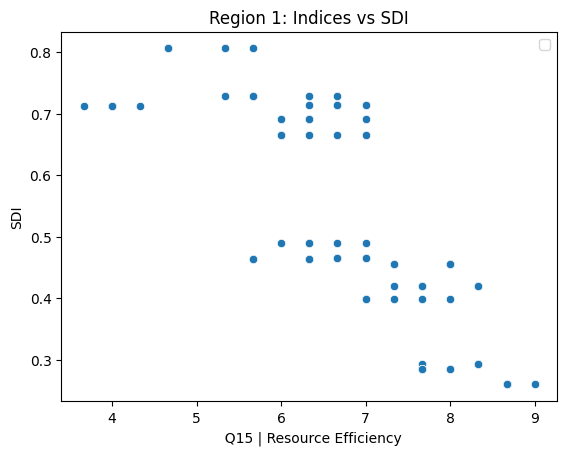

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


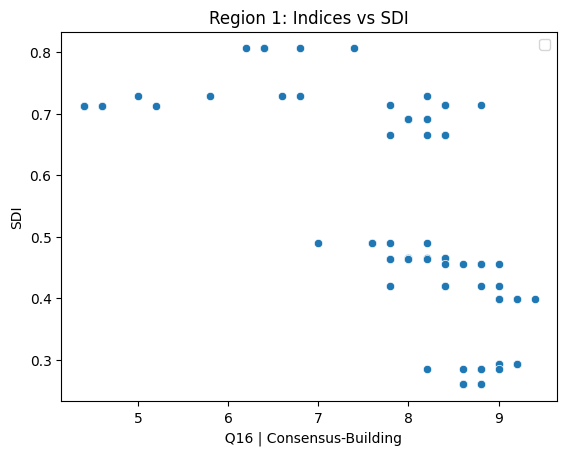

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


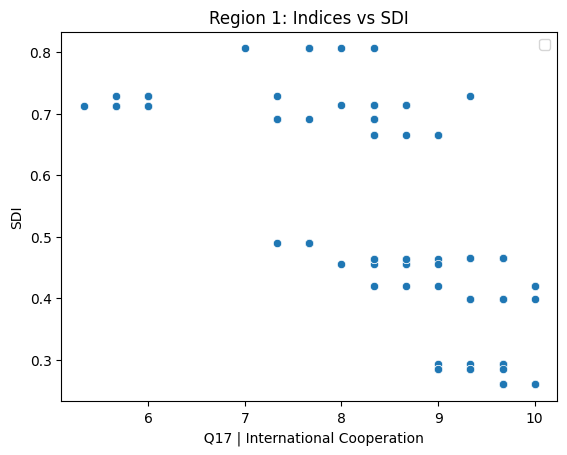

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


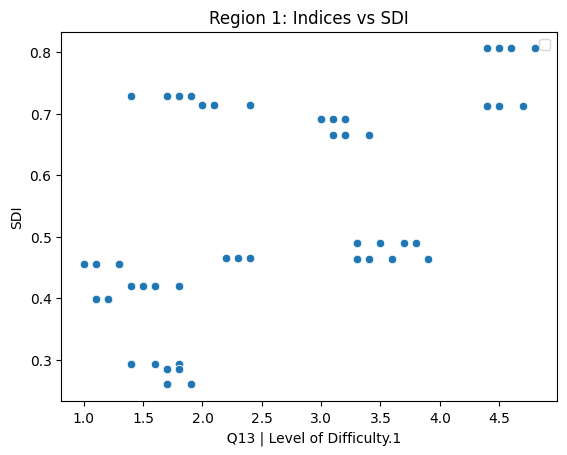

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


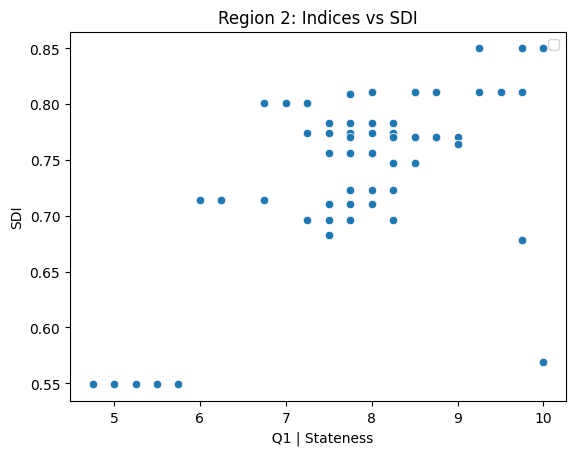

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


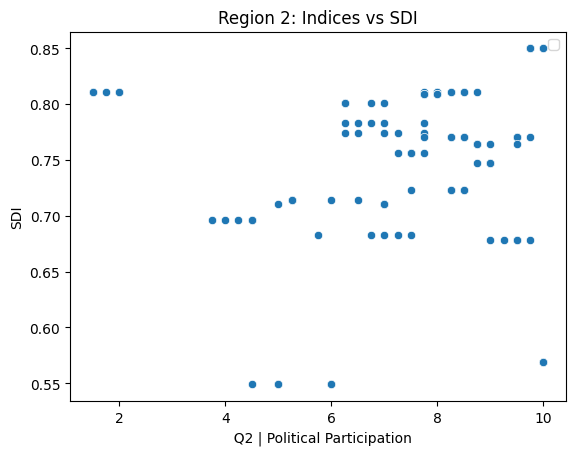

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


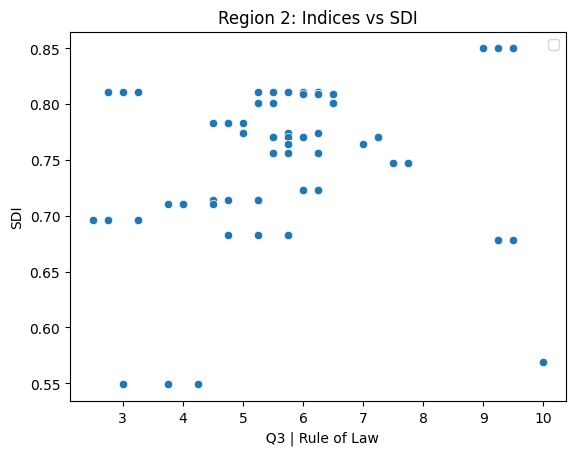

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


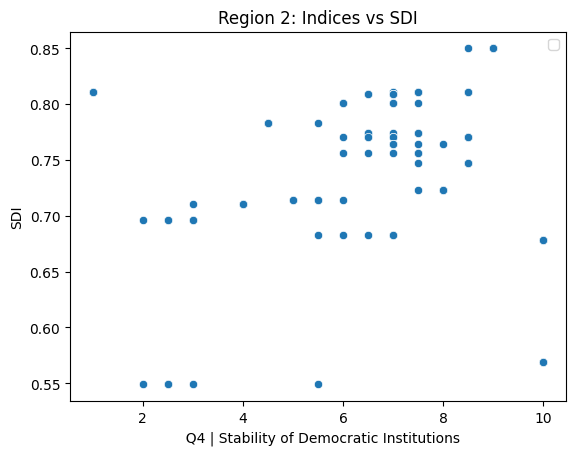

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


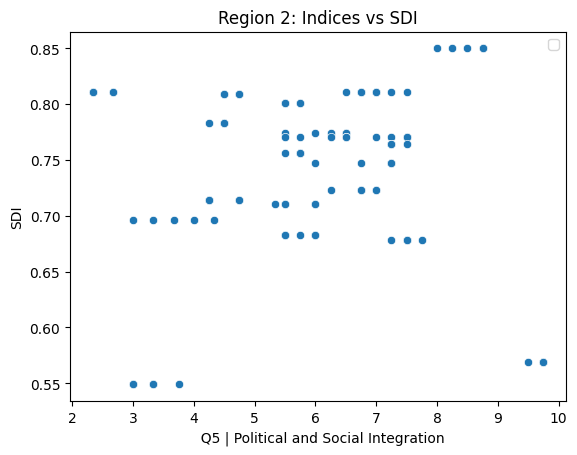

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


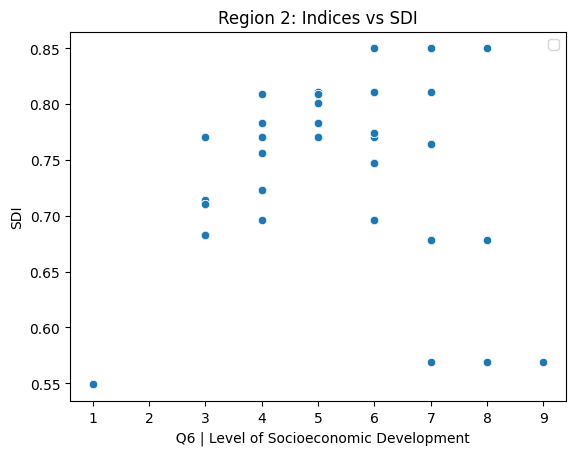

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


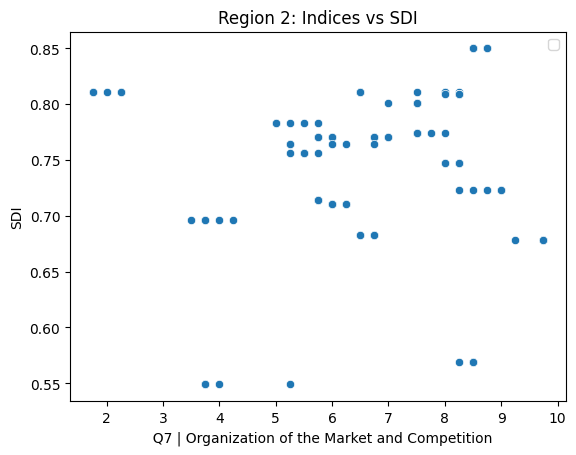

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


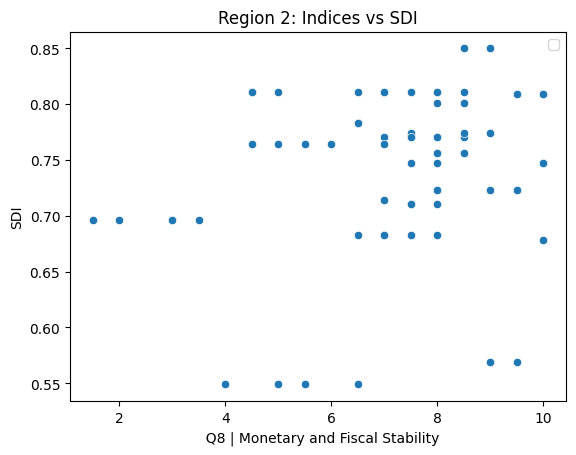

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


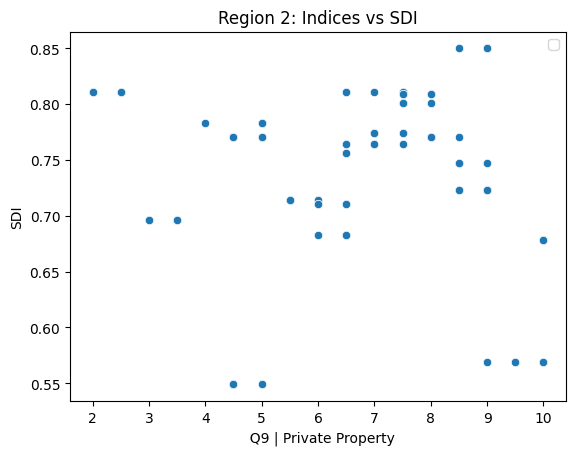

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


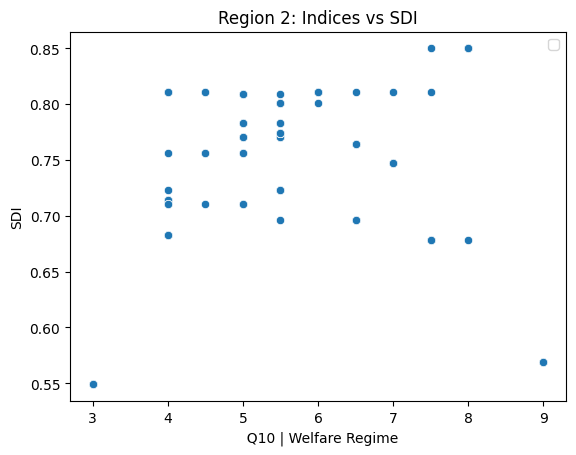

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


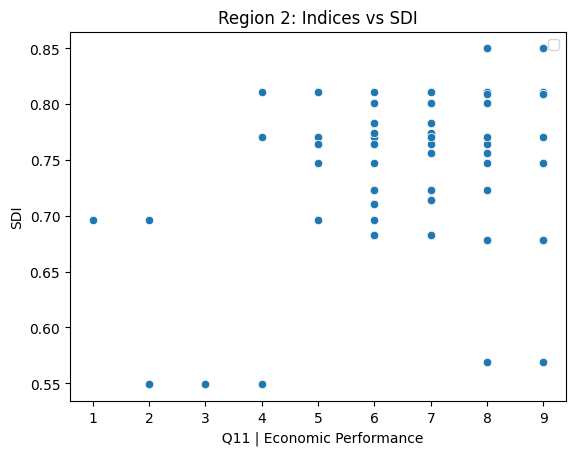

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


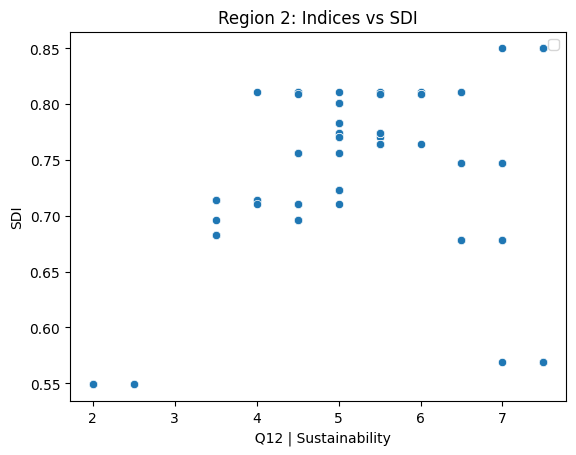

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


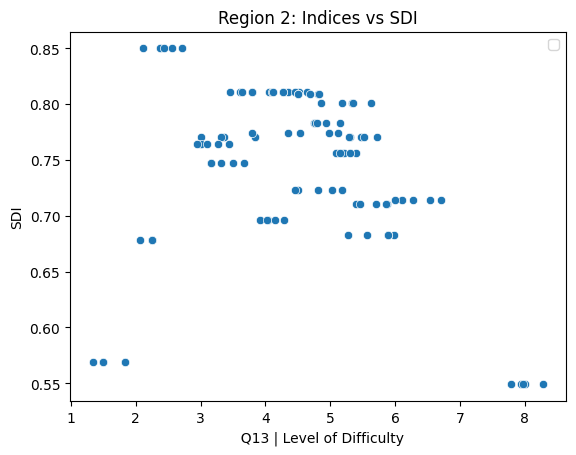

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


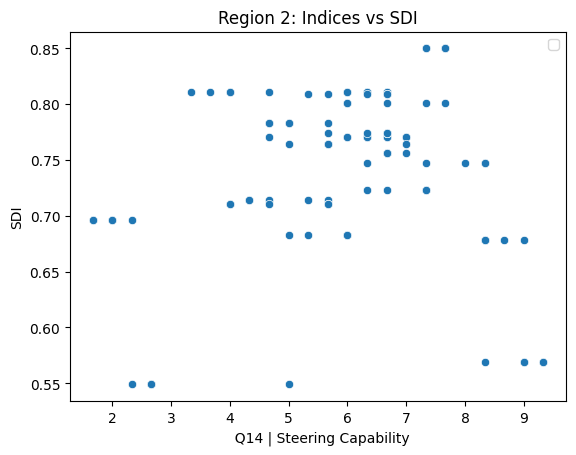

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


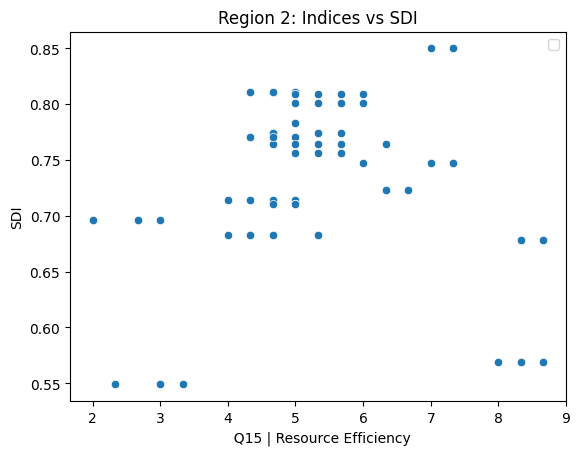

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


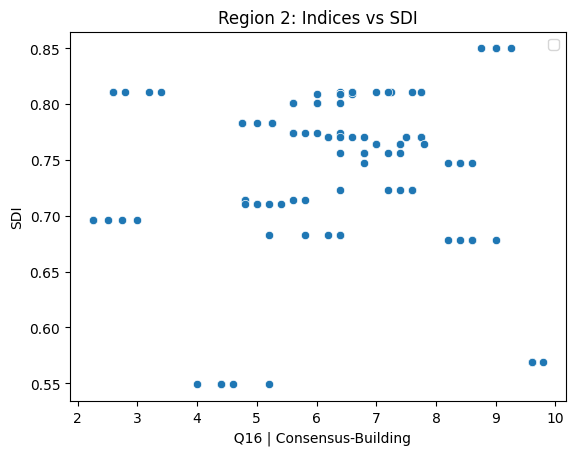

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


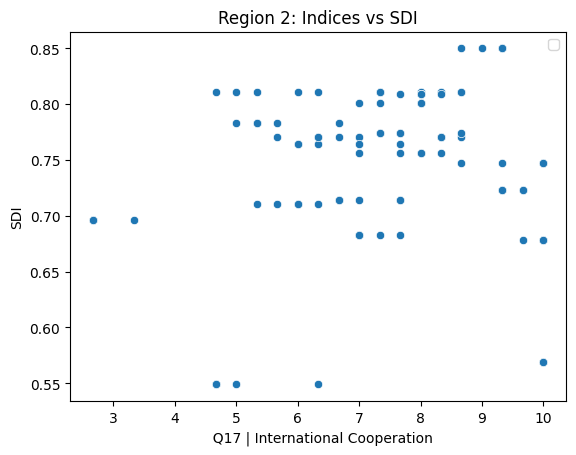

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


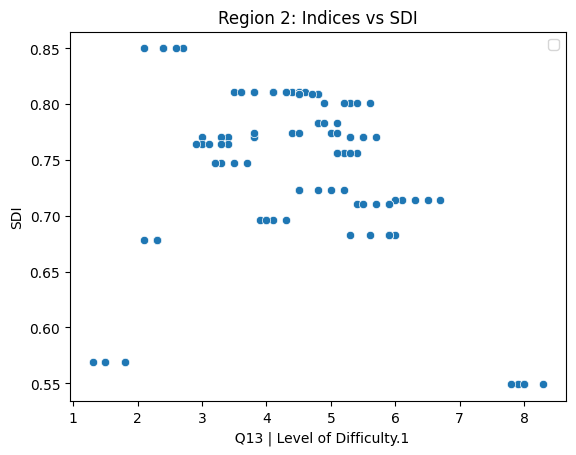

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


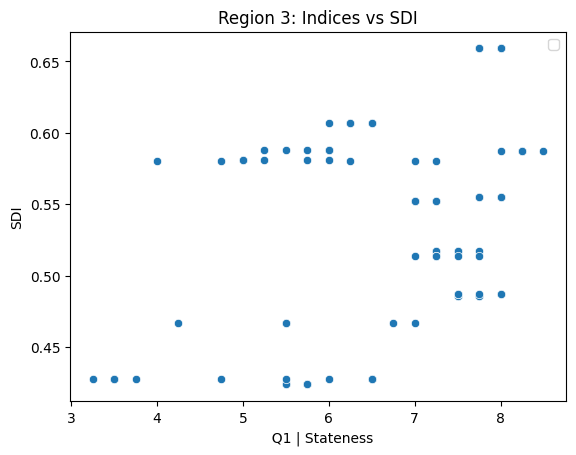

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


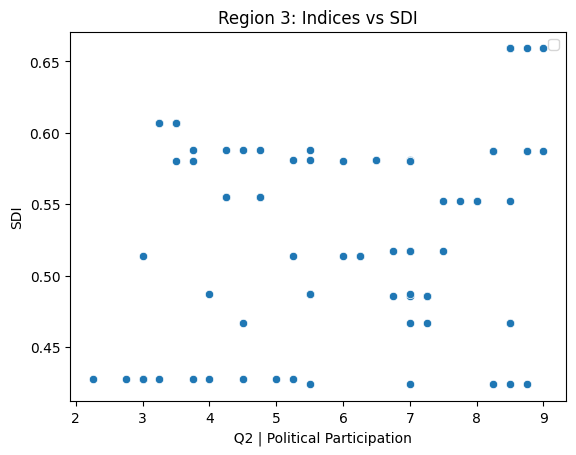

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


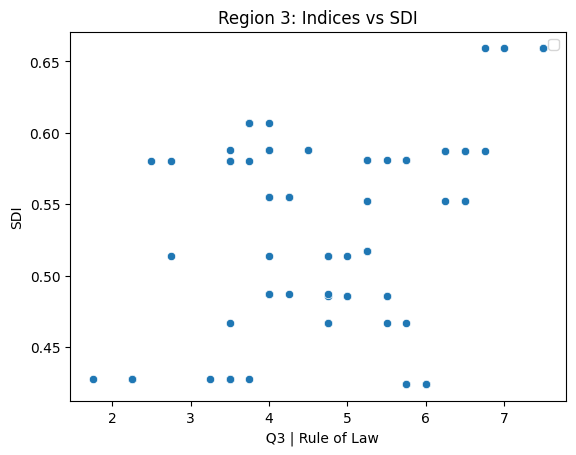

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


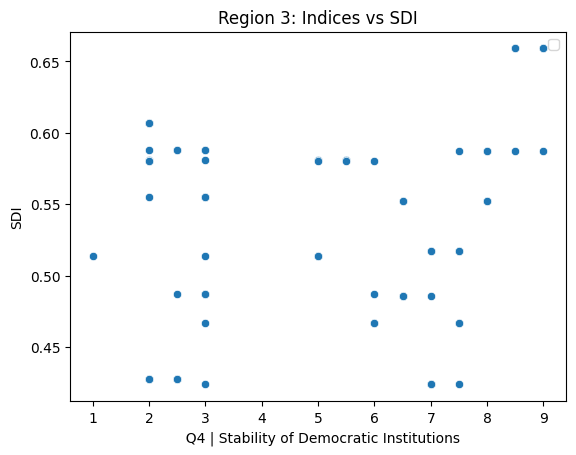

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


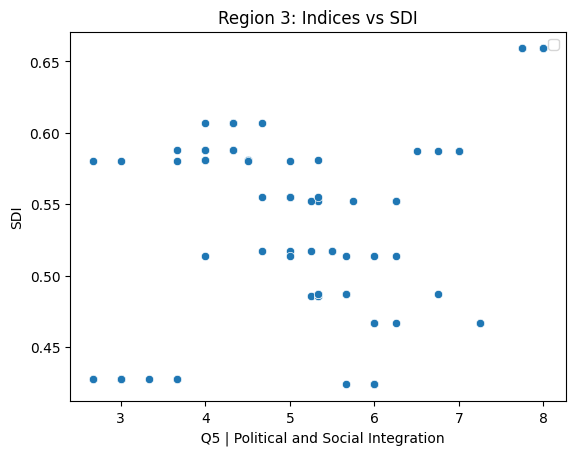

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


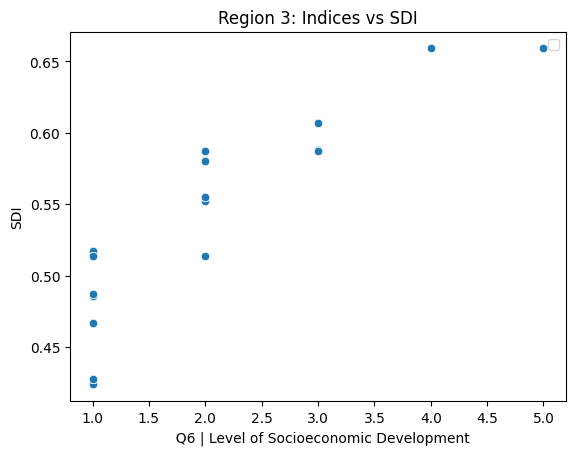

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


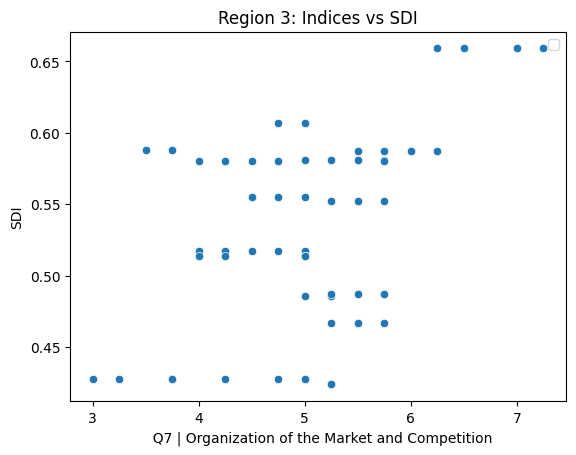

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


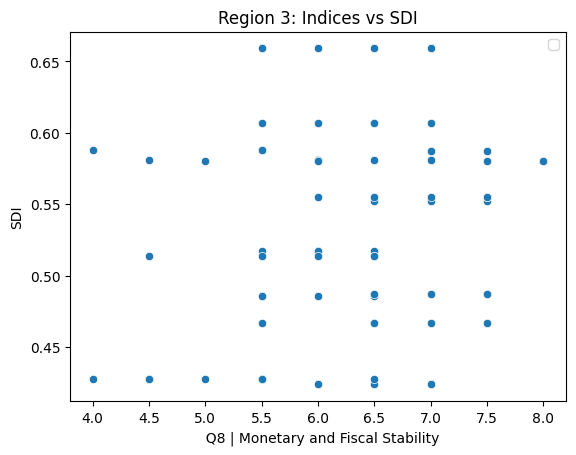

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


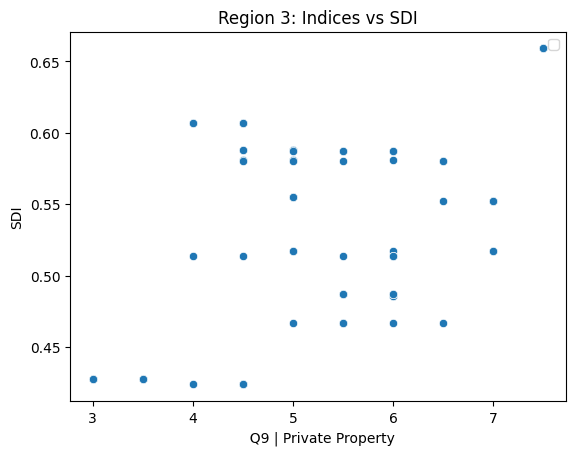

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


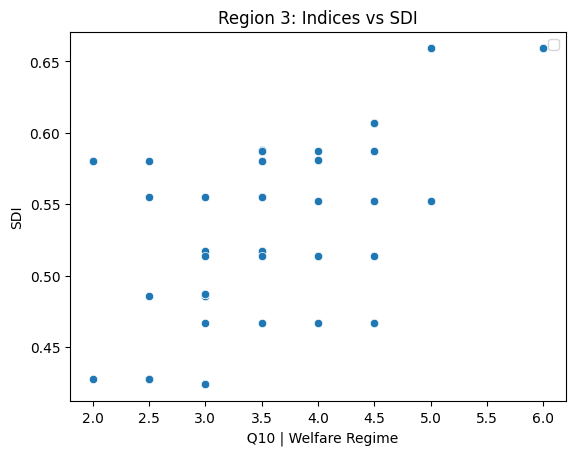

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


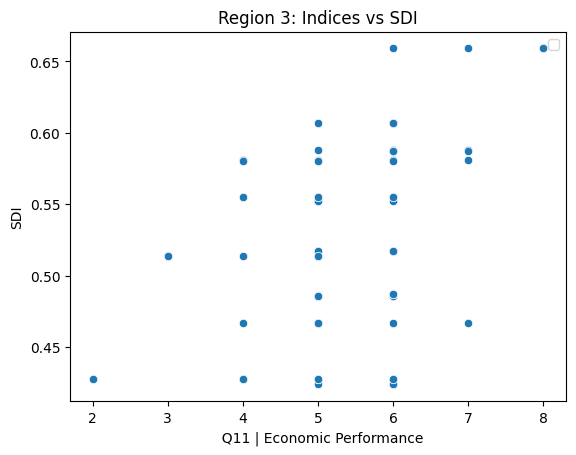

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


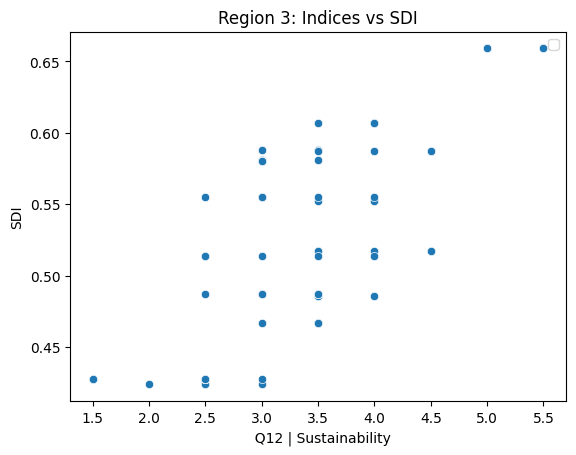

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


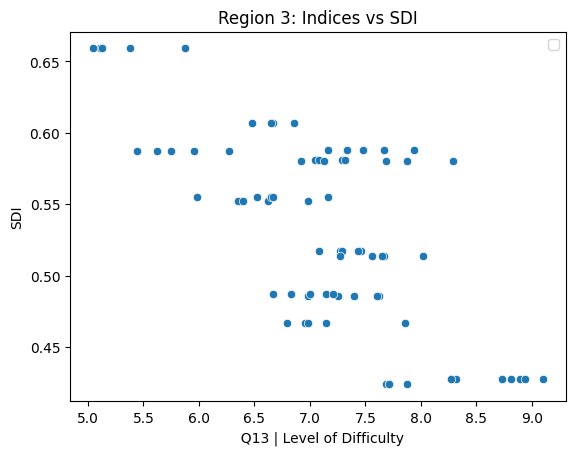

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


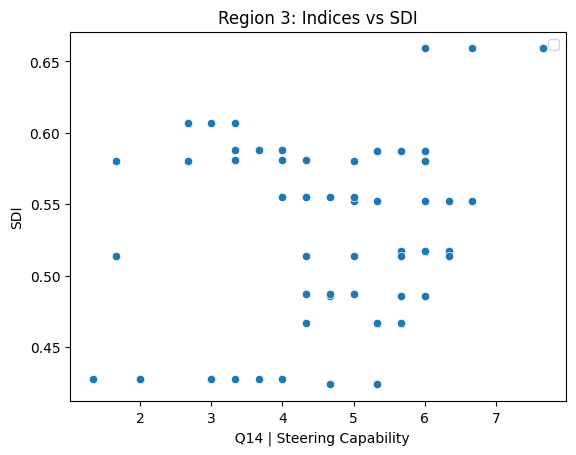

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


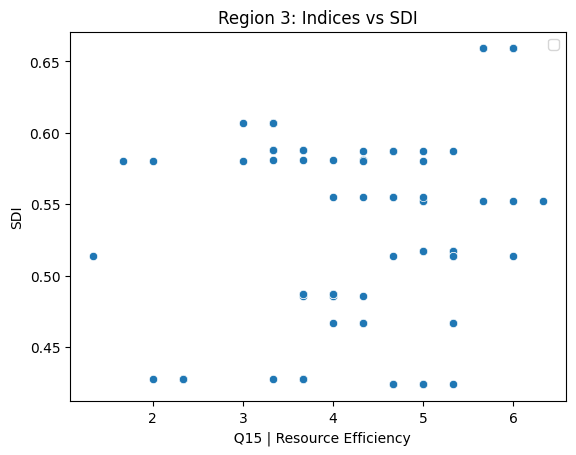

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


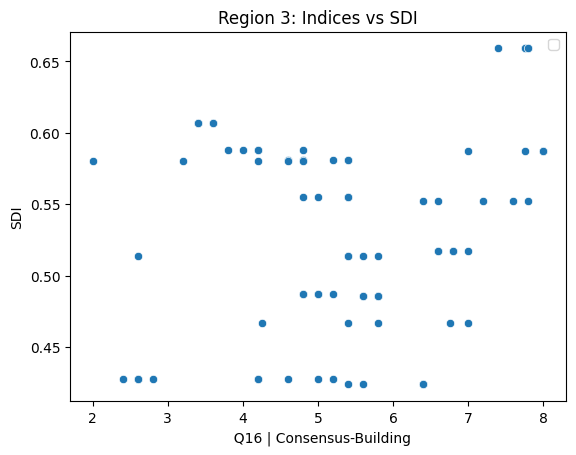

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


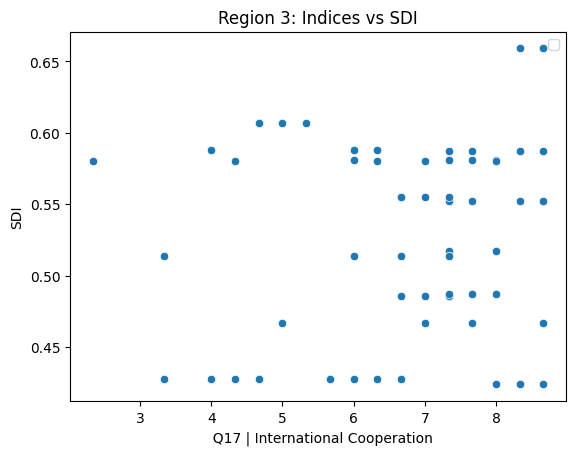

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


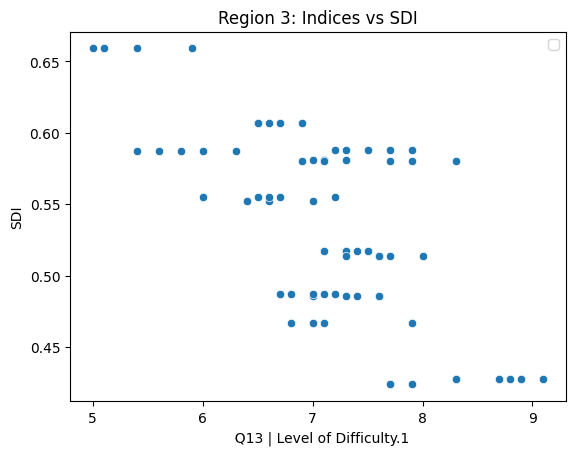

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


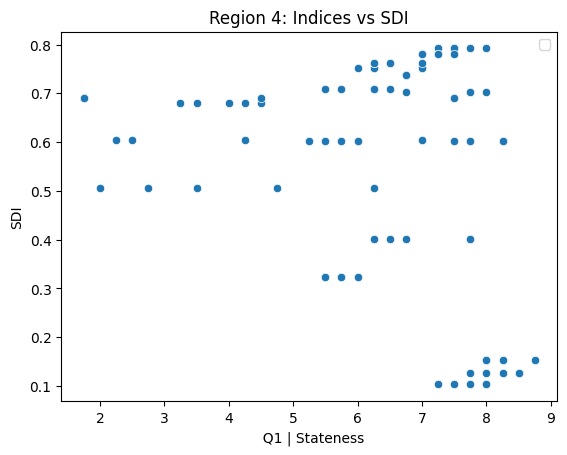

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


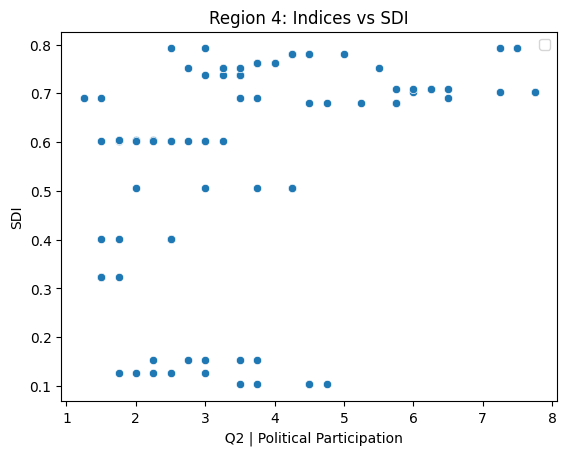

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


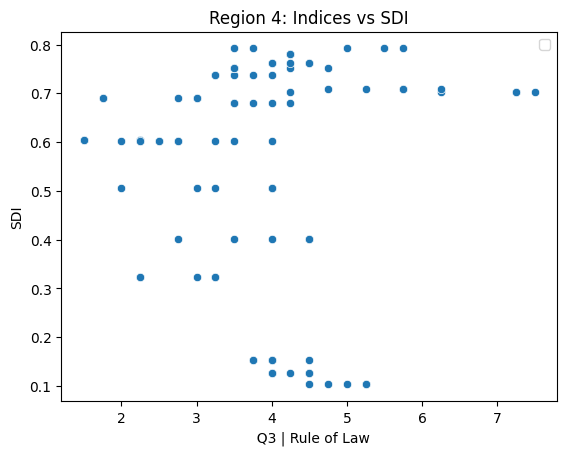

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


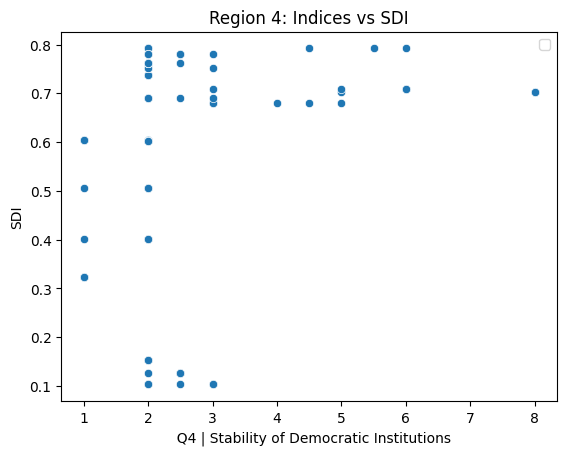

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


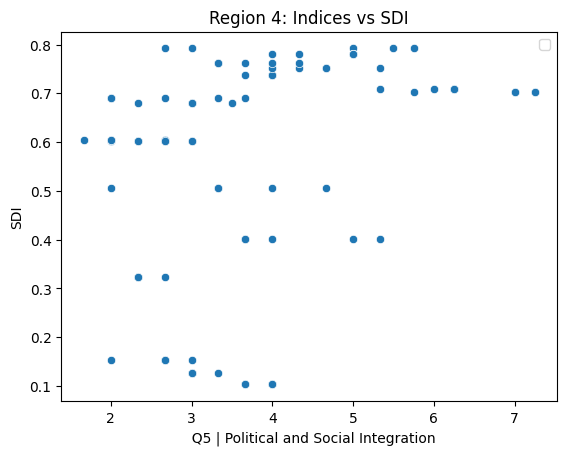

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


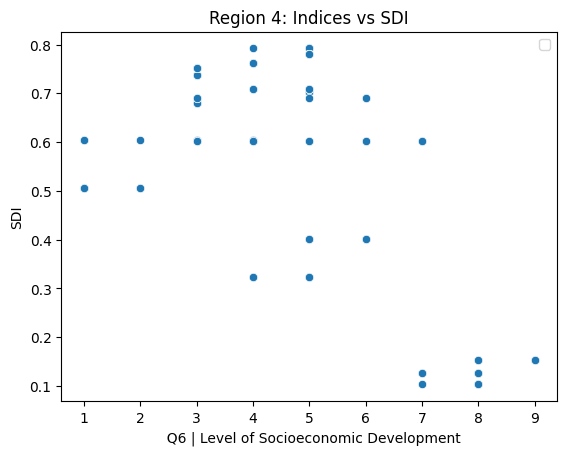

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


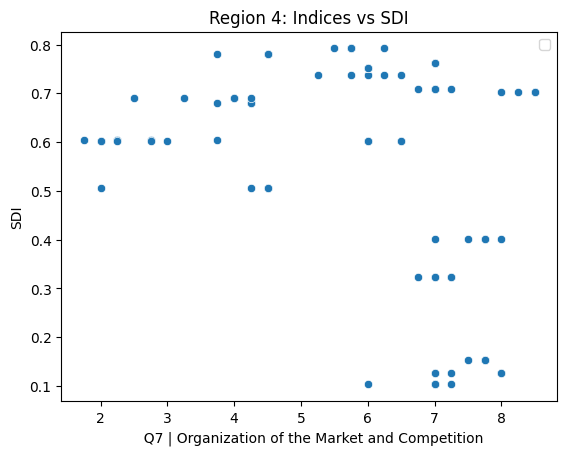

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


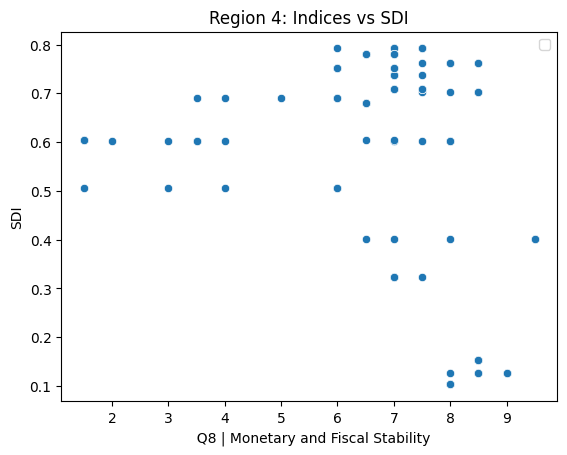

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


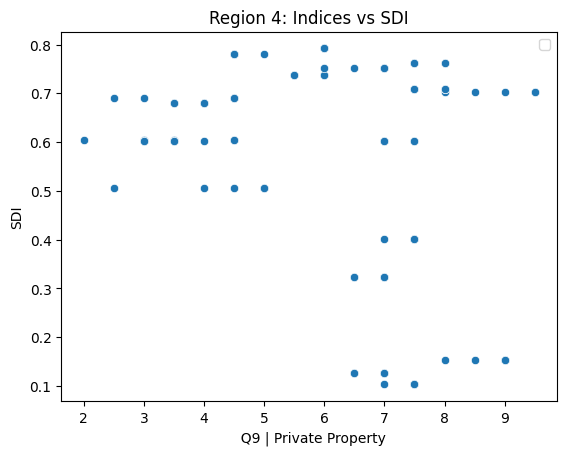

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


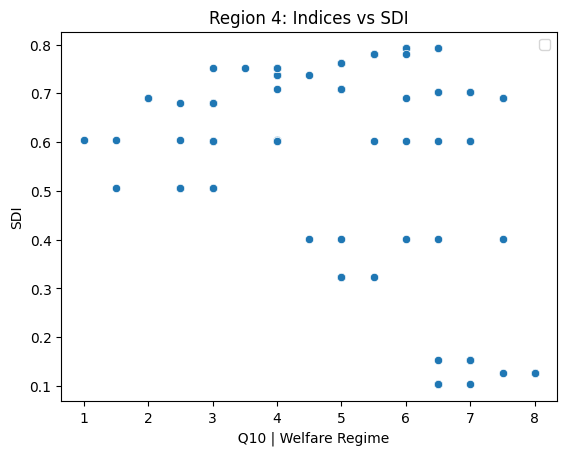

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


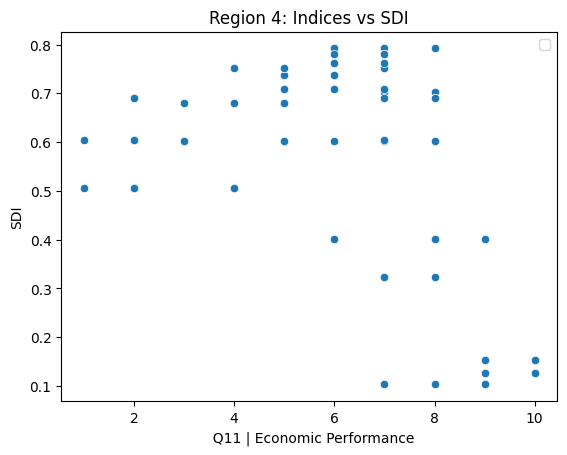

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


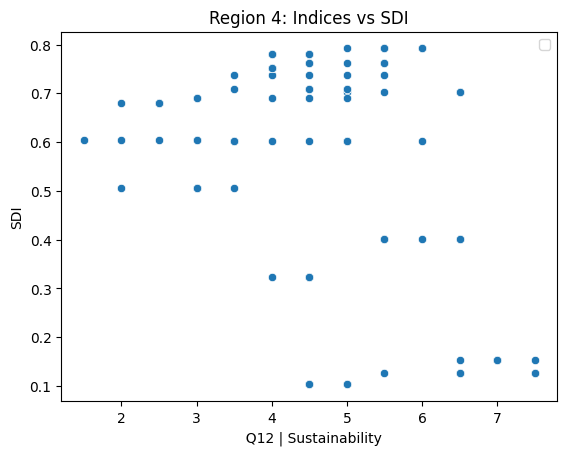

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


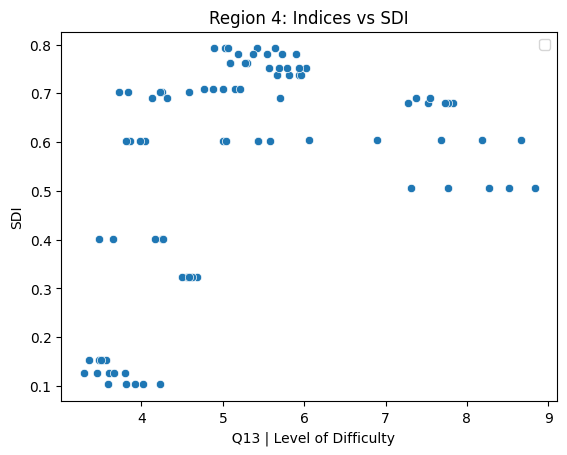

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


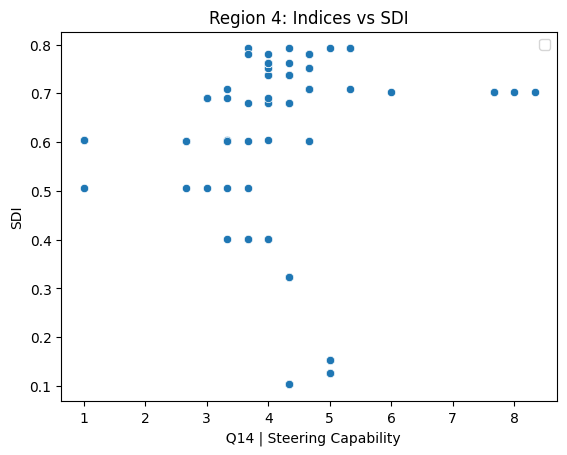

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


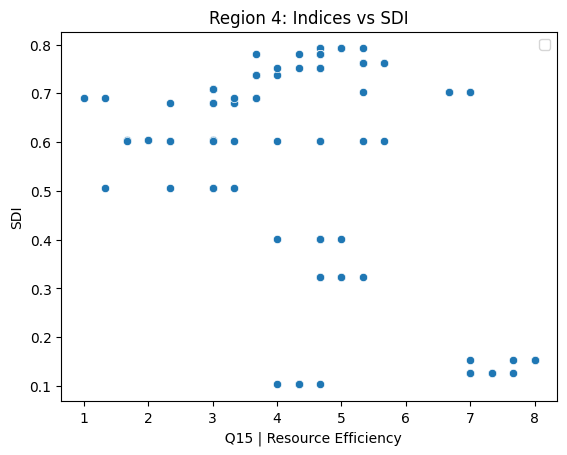

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


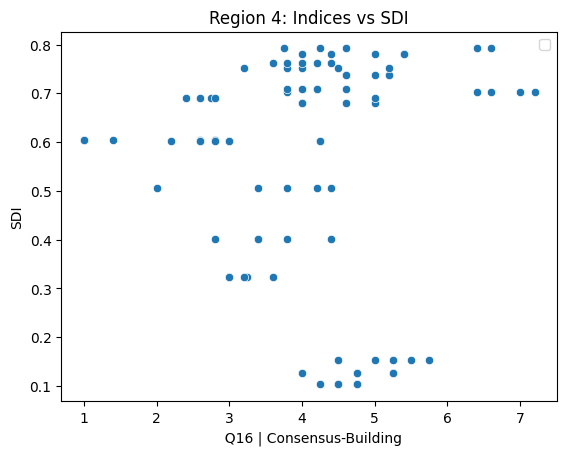

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


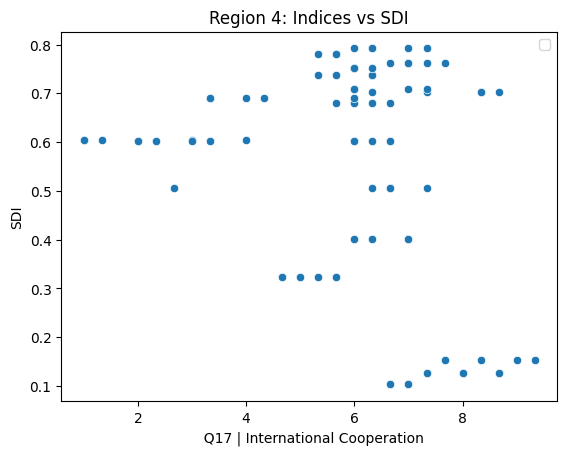

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


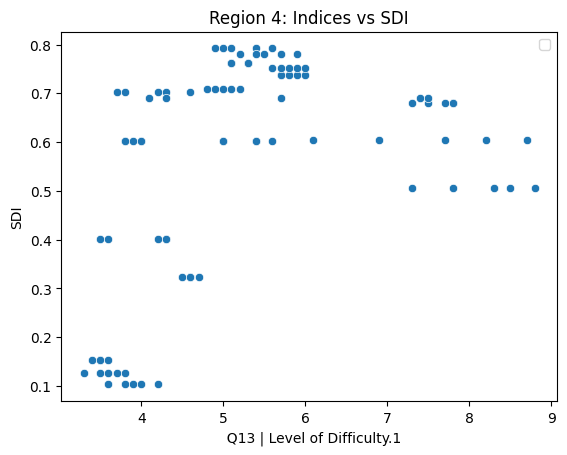

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


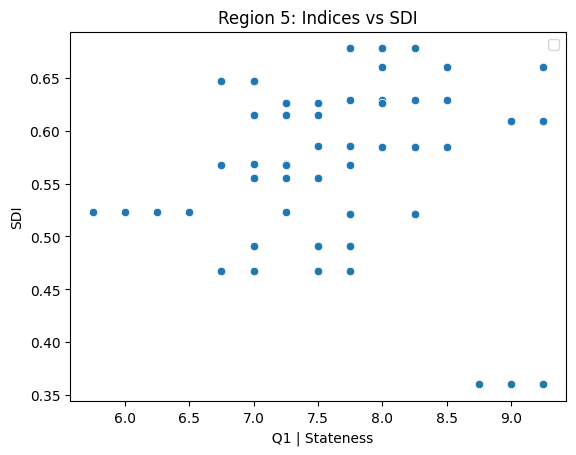

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


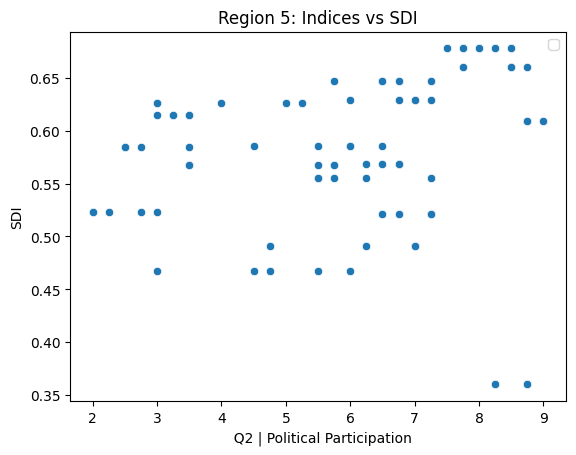

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


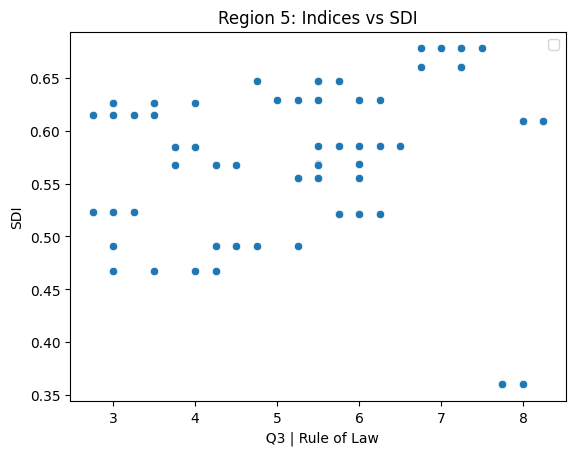

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


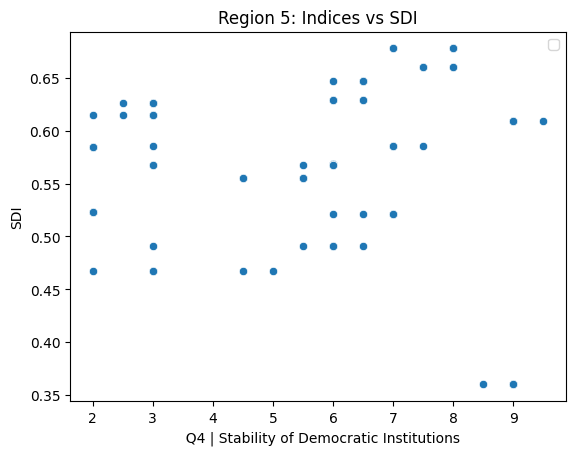

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


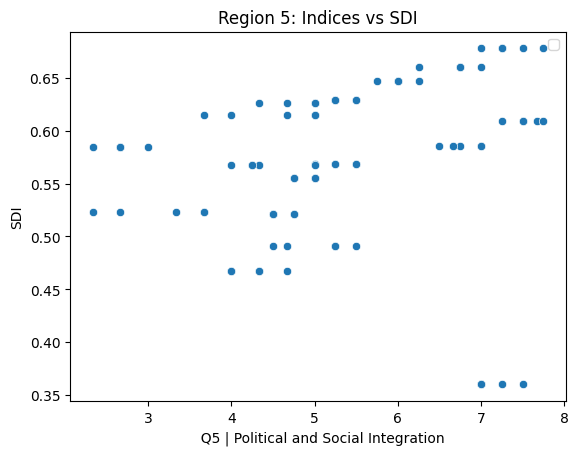

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


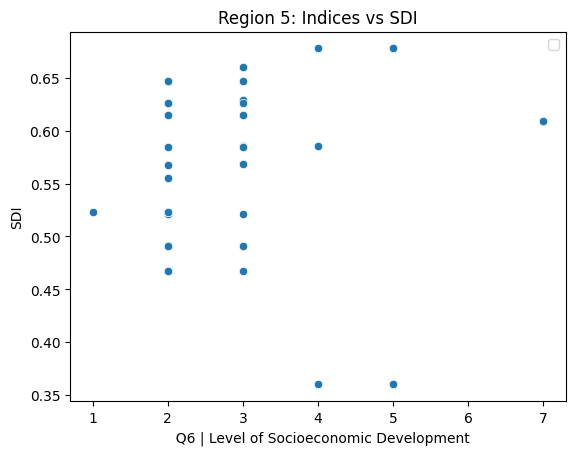

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


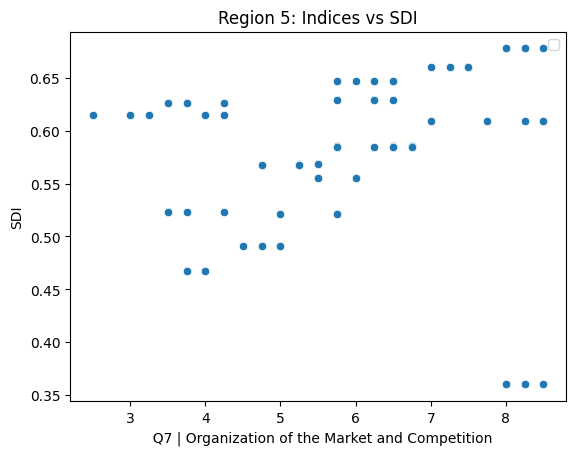

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


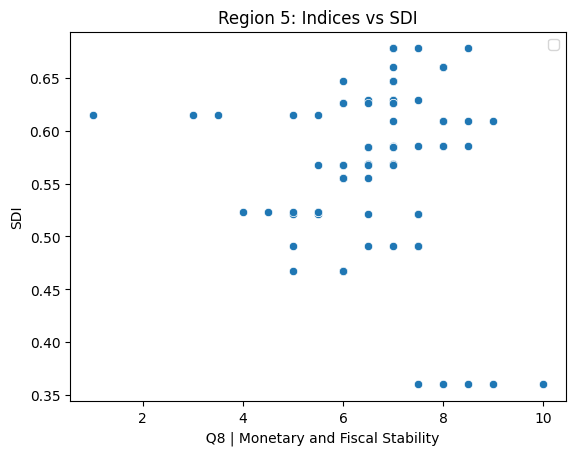

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


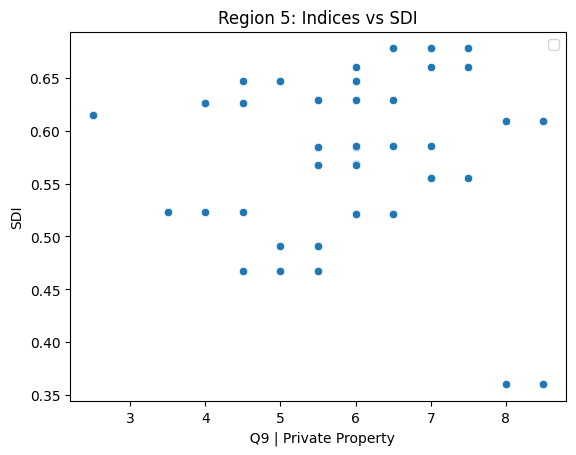

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


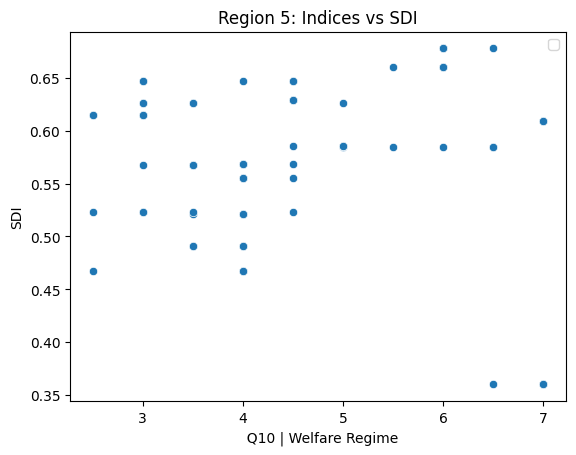

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


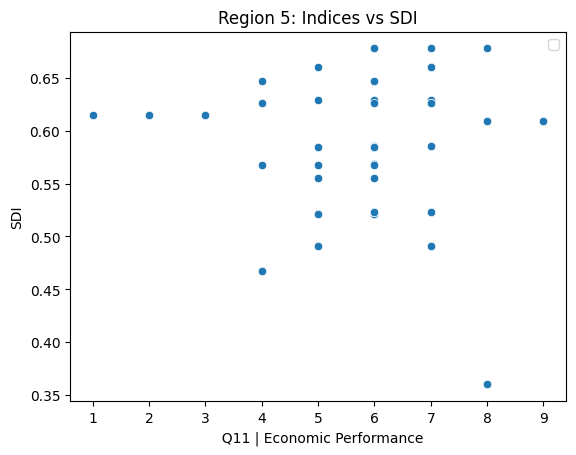

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


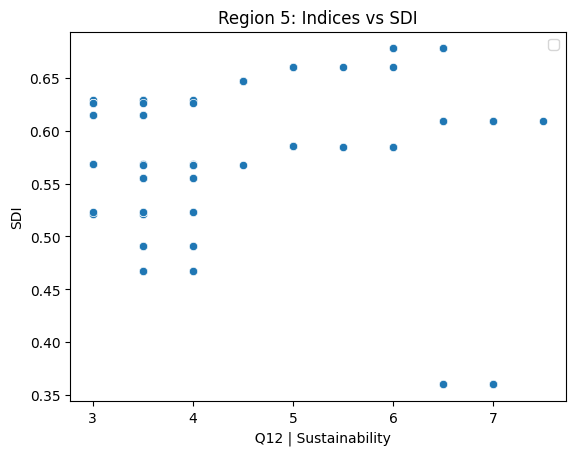

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


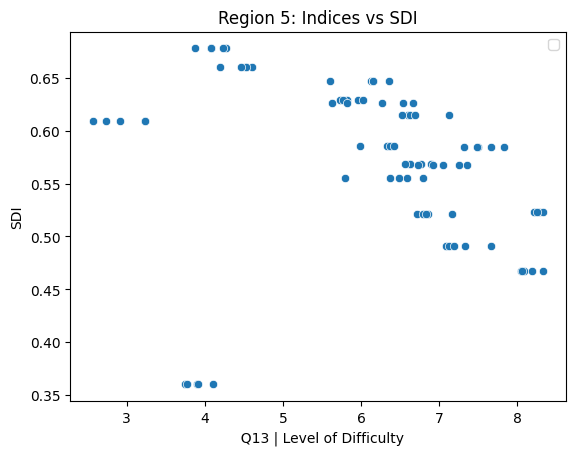

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


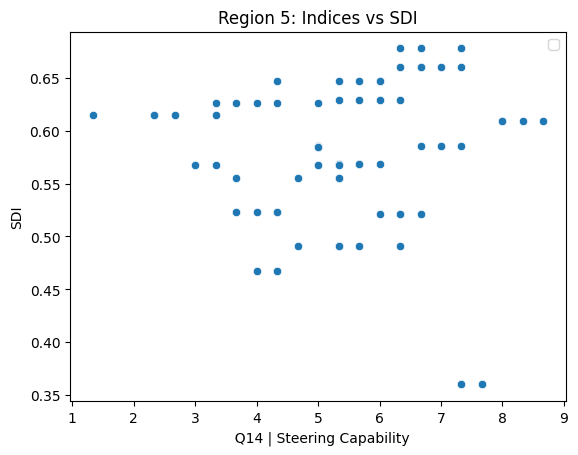

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


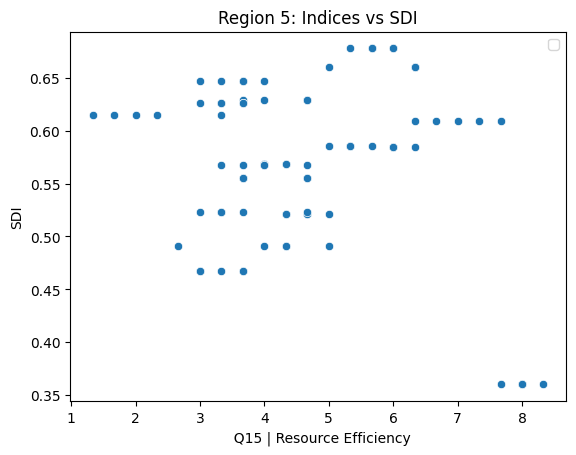

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


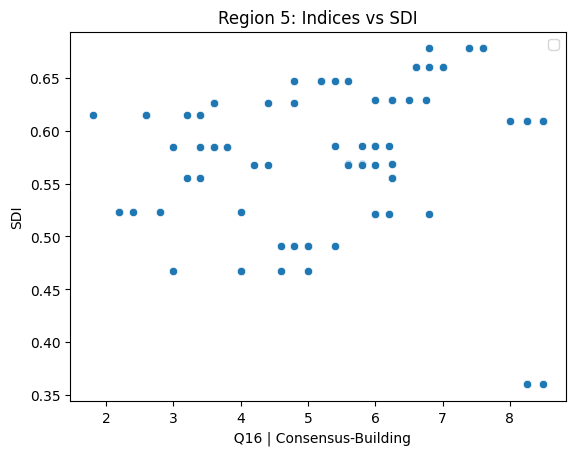

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


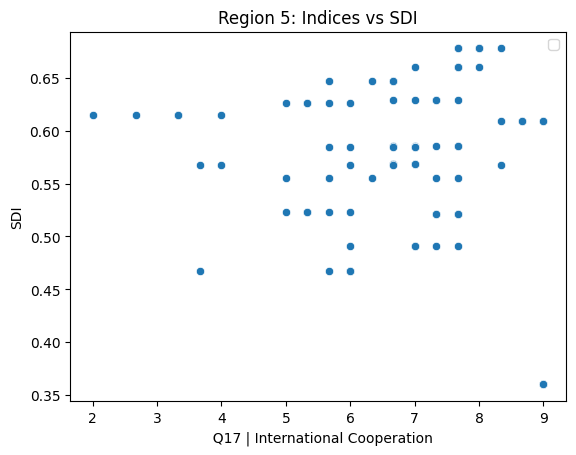

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


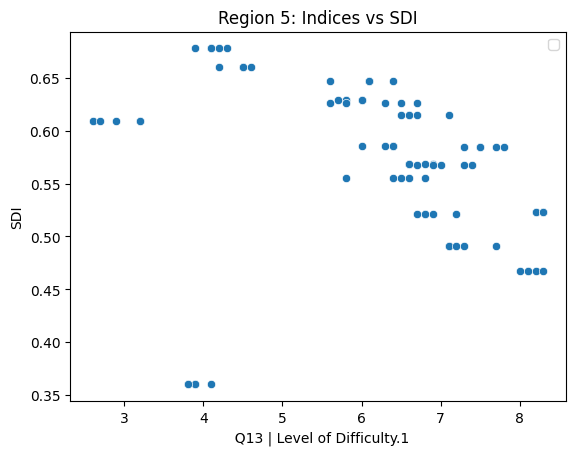

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


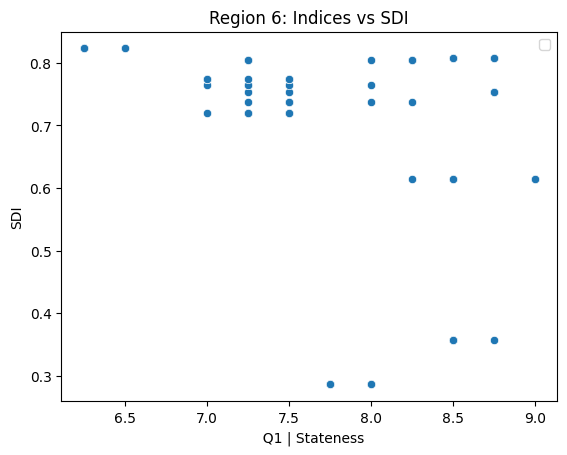

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


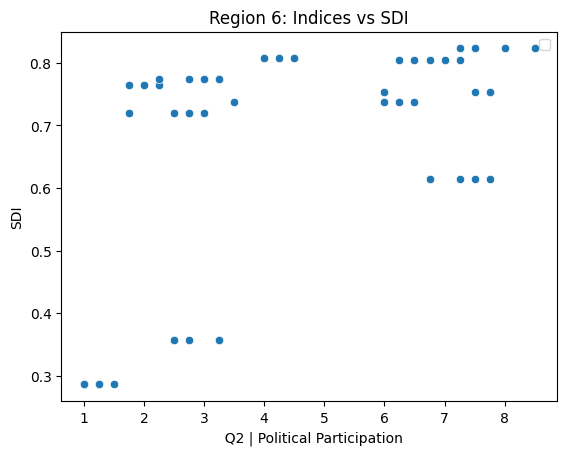

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


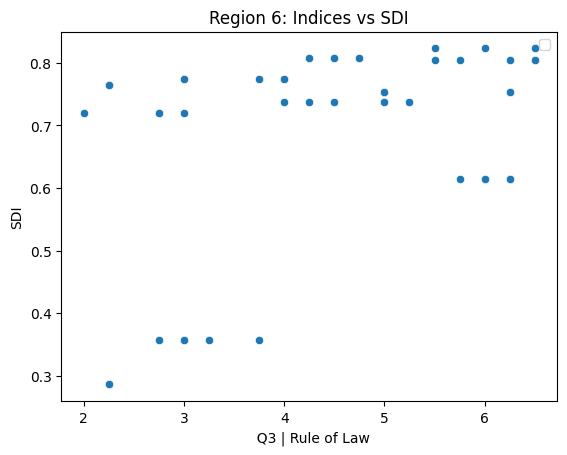

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


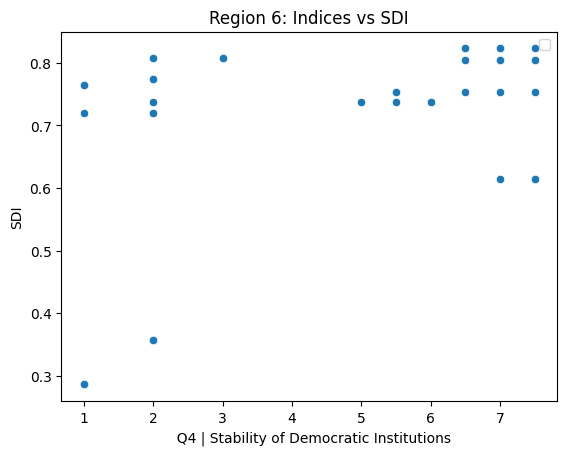

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


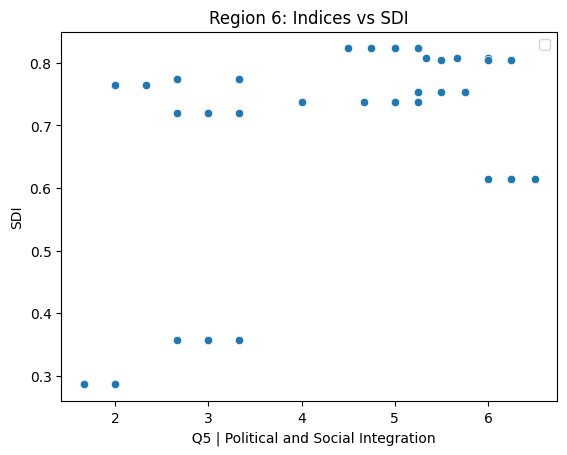

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


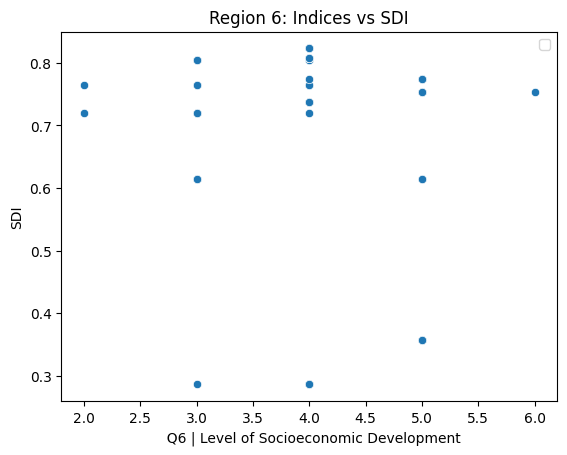

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


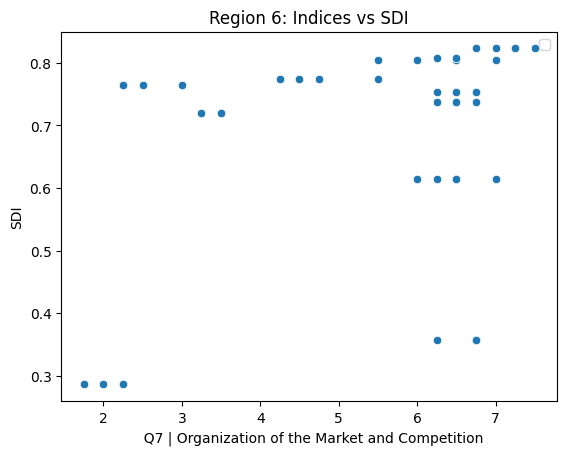

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


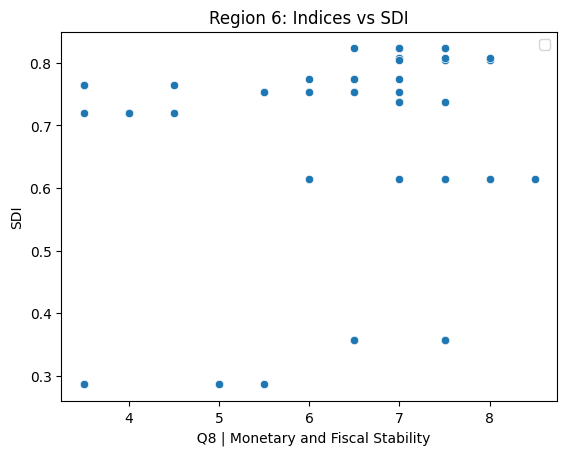

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


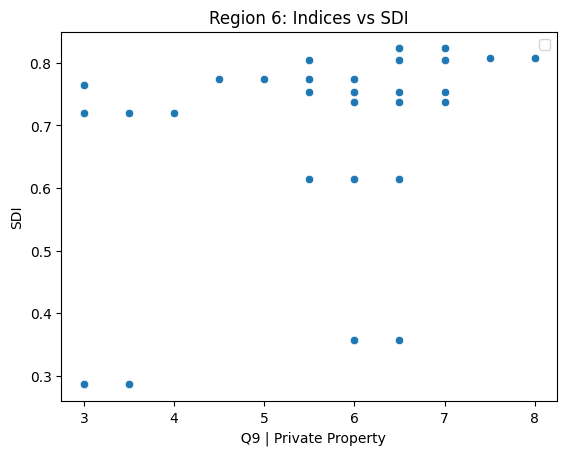

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


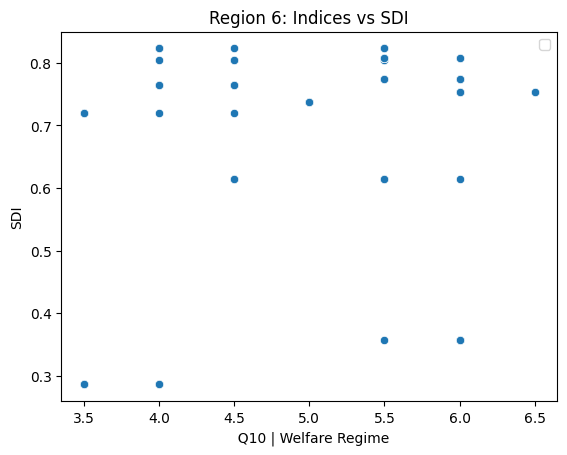

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


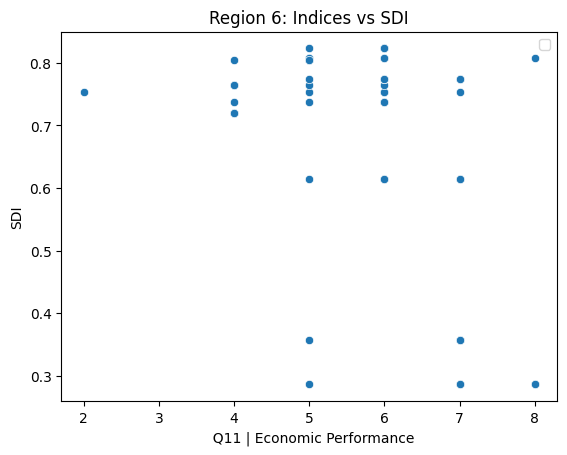

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


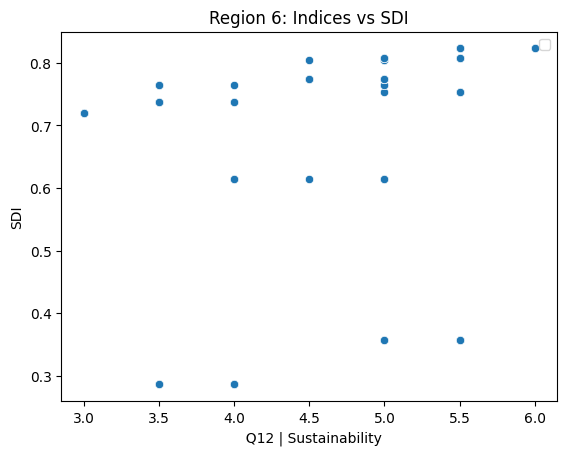

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


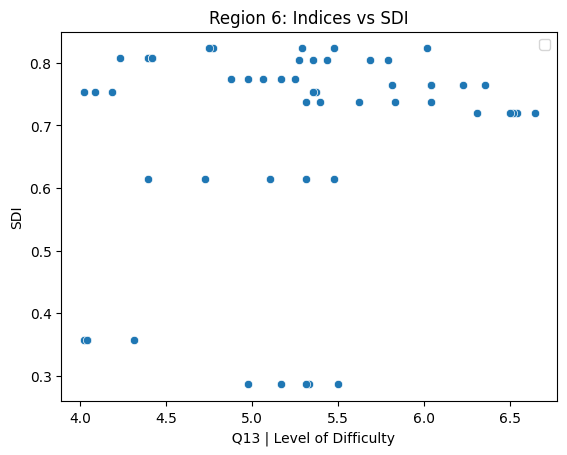

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


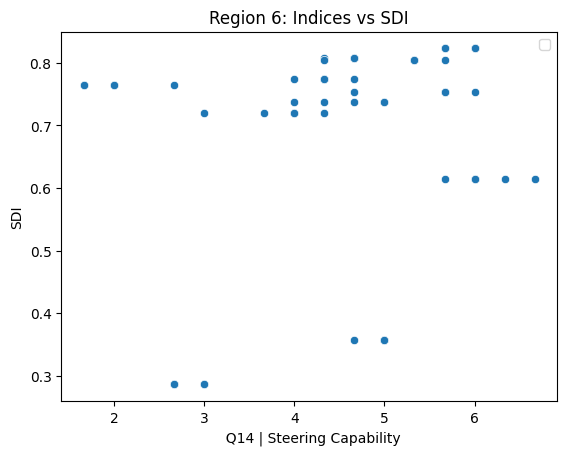

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


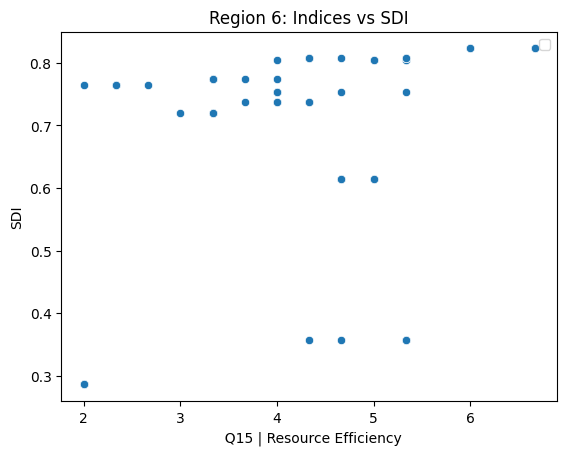

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


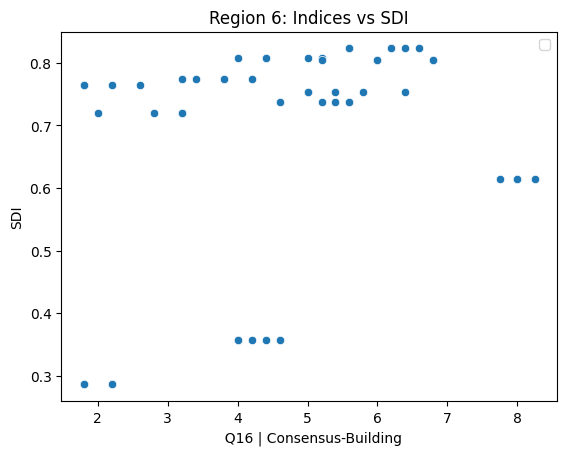

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


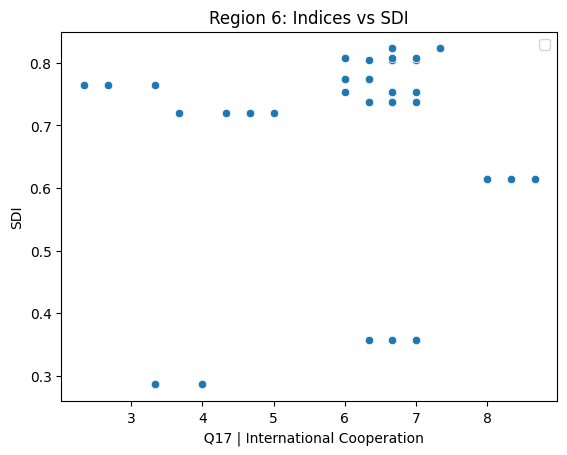

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


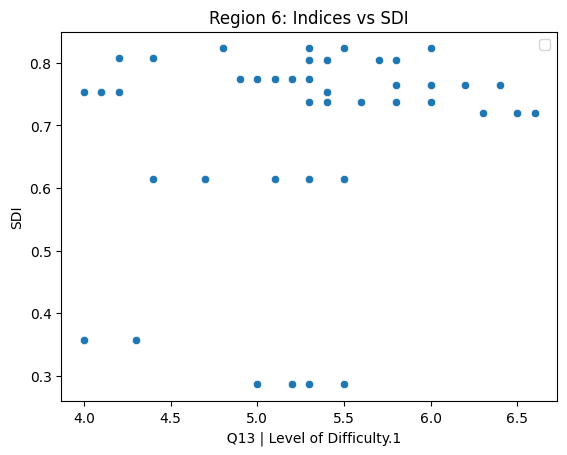

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


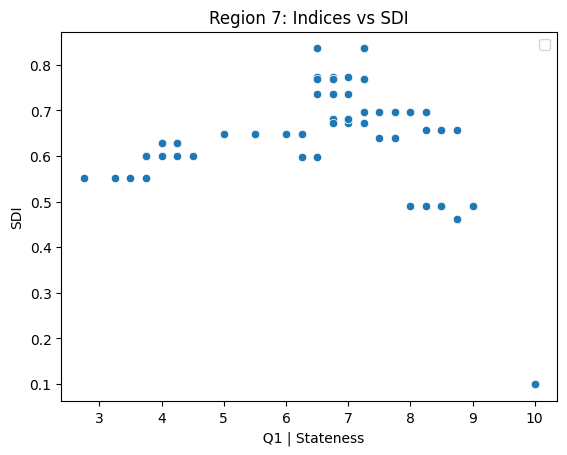

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


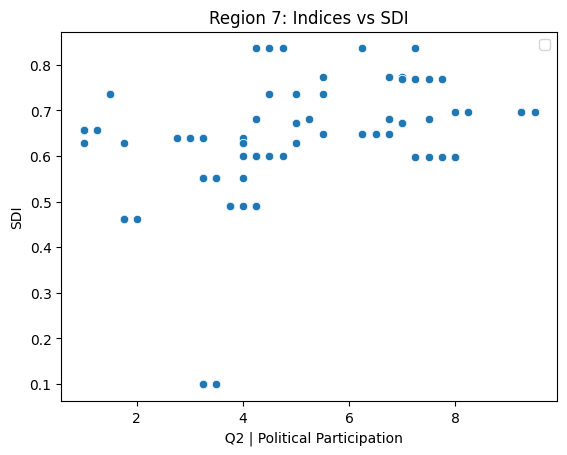

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


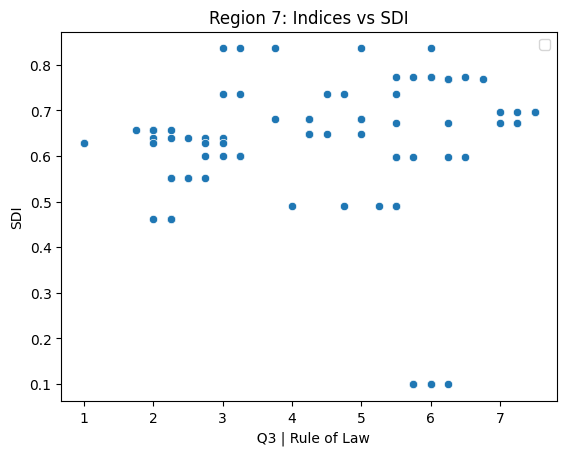

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


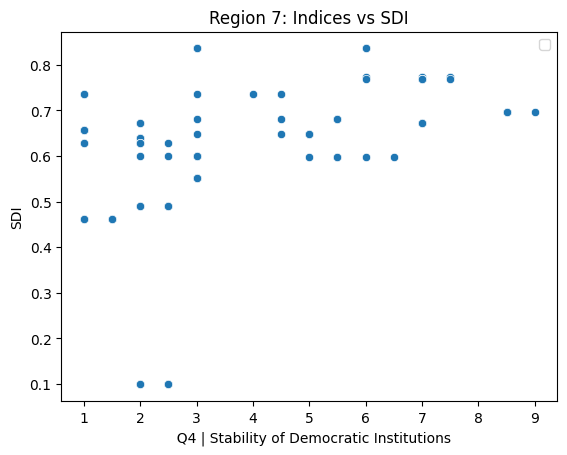

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


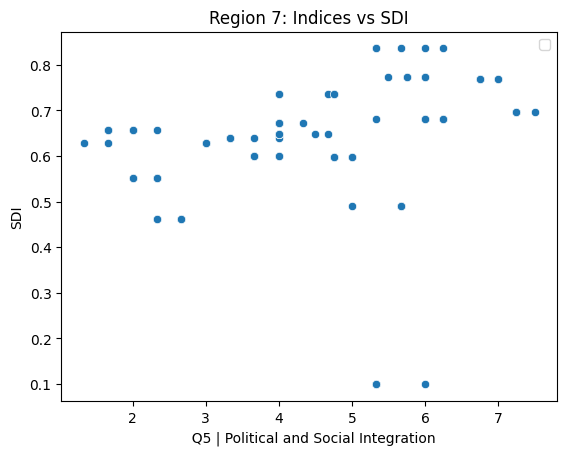

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


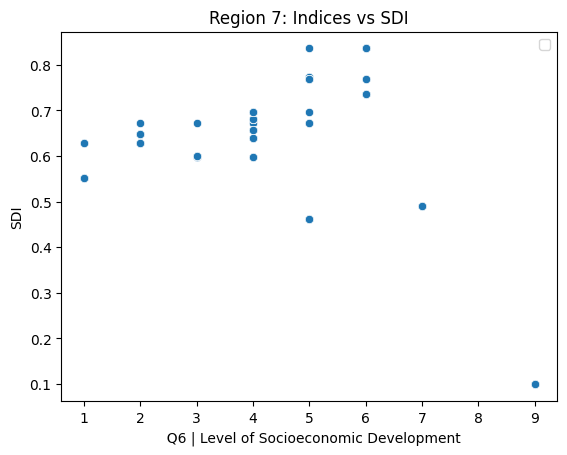

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


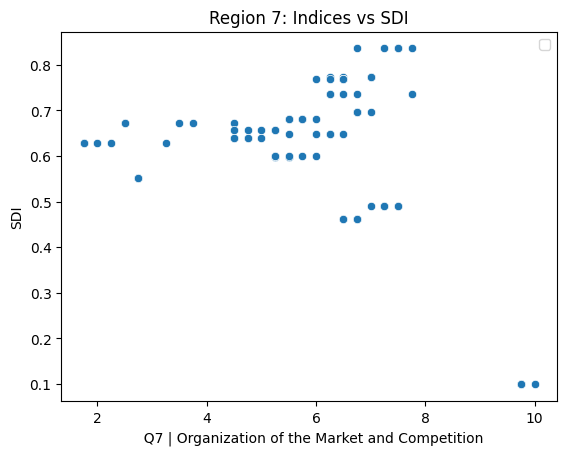

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


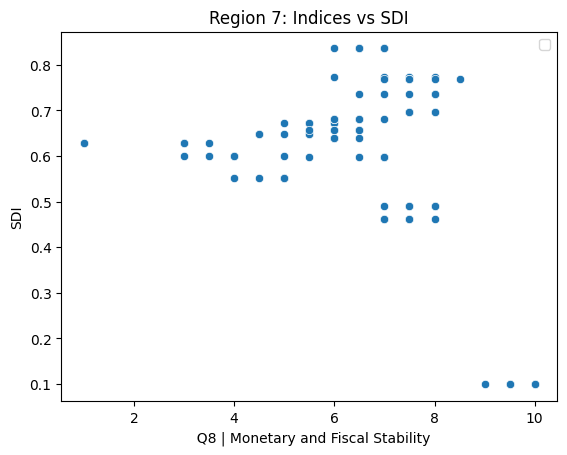

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


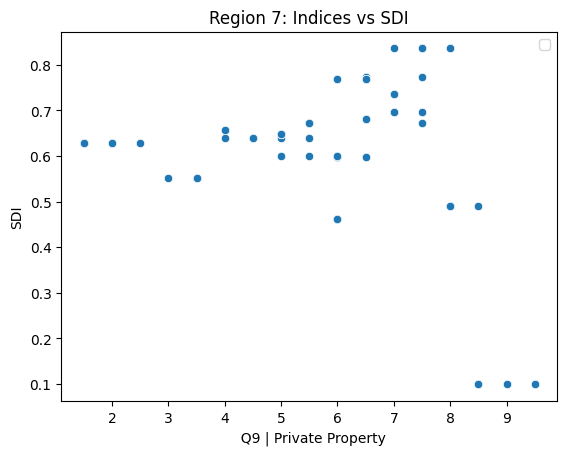

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


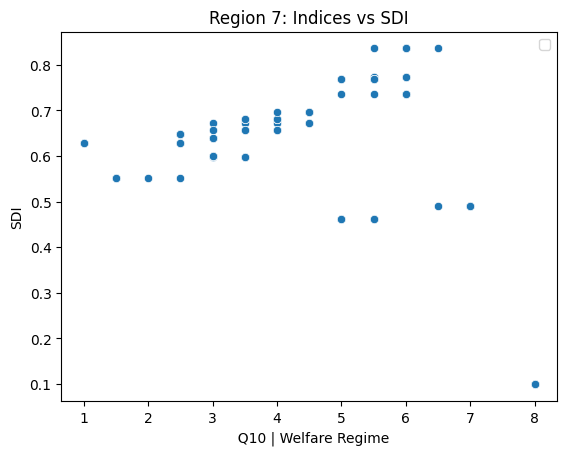

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


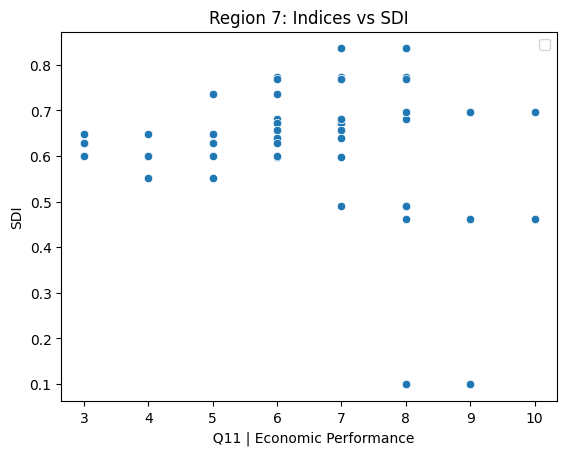

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


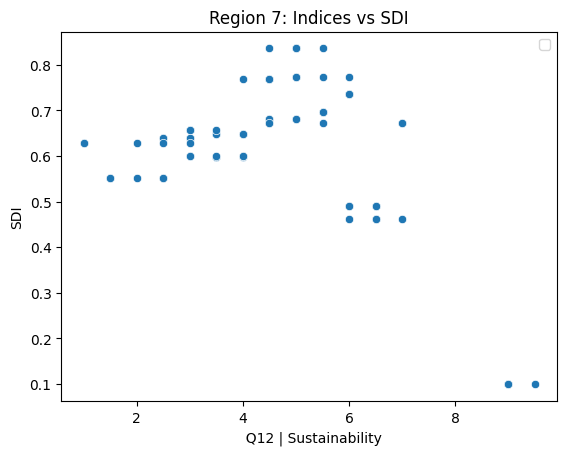

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


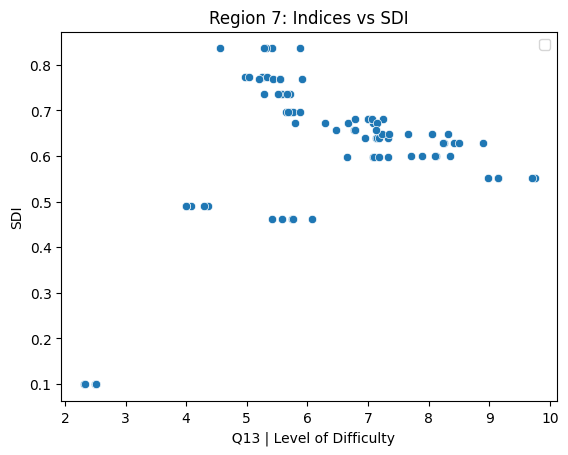

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


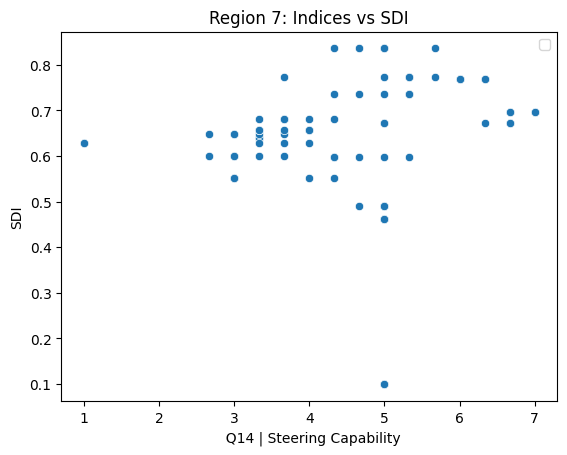

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


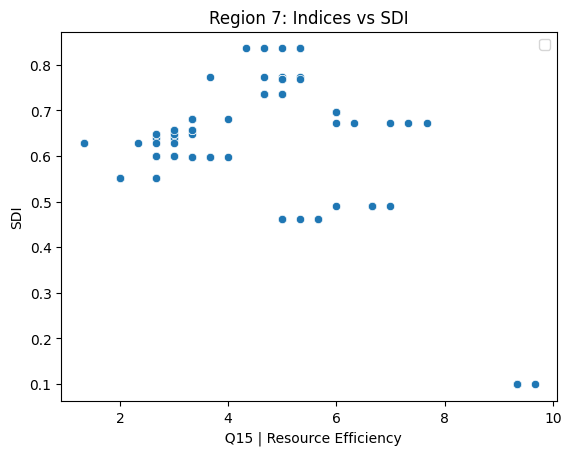

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


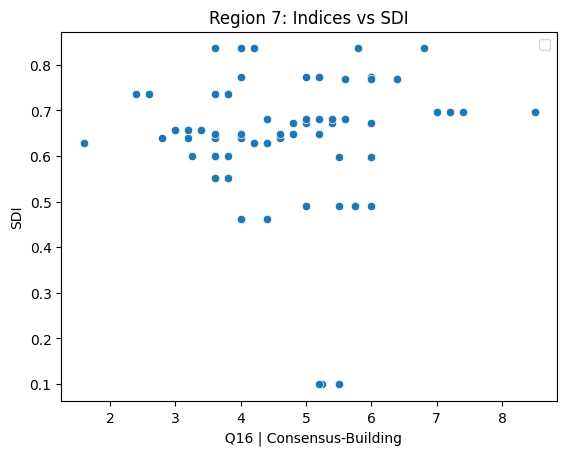

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


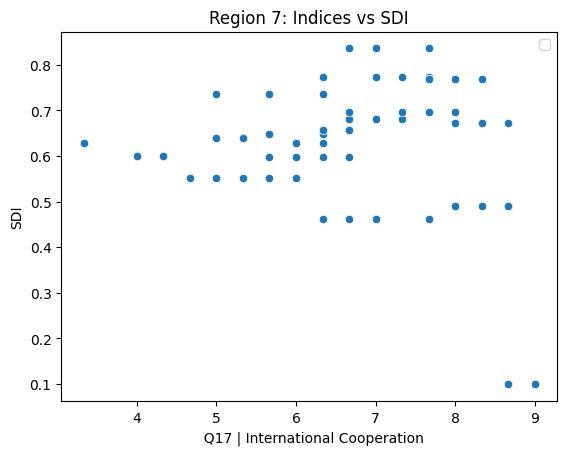

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


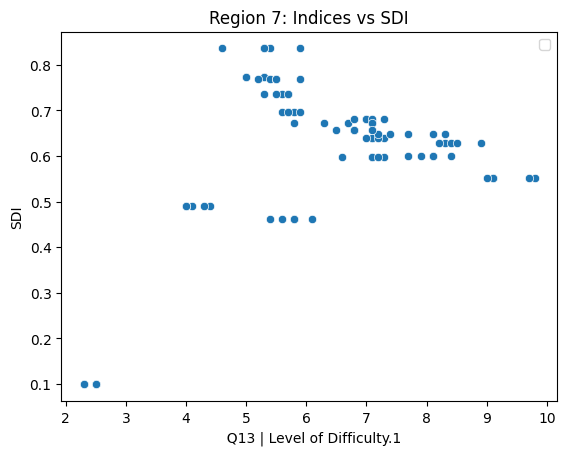

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# Assuming 'important_indices' is prepared and cleaned

regions = [1, 2, 3, 4, 5, 6, 7]
important_indices_array = [col for col in important_indices.columns if col not in ['SDI', 'Region', 'Year', 'Country']]

# Create plots separated by region
for region in regions:
    #plt.figure(figsize=(10, 8))  # Adjust the size as needed
    group_country = important_indices.loc[important_indices['Region'] == region]

    for index in important_indices_array:
        sns.scatterplot(x=group_country[index], y=group_country['SDI'])

        plt.title(f'Region {region}: Indices vs SDI')
        plt.xlabel(index)
        plt.ylabel('SDI')
        plt.legend()
        plt.show()


In [10]:
important_indices_array

['  Q1 | Stateness',
 '  Q2 | Political Participation',
 '  Q3 | Rule of Law',
 '  Q4 | Stability of Democratic Institutions',
 '  Q5 | Political and Social Integration',
 '  Q6 | Level of Socioeconomic Development',
 '  Q7 | Organization of the Market and Competition',
 '  Q8 | Monetary and Fiscal Stability',
 '  Q9 | Private Property',
 '  Q10 | Welfare Regime',
 '  Q11 | Economic Performance',
 '  Q12 | Sustainability',
 '  Q13 | Level of Difficulty',
 '  Q14 | Steering Capability',
 '  Q15 | Resource Efficiency',
 '  Q16 | Consensus-Building',
 '  Q17 | International Cooperation',
 '  Q13 | Level of Difficulty.1']

In [11]:
important_indices

,Year,Country,Region,SDI,Q1 | Stateness,Q2 | Political Participation,Q3 | Rule of Law,Q4 | Stability of Democratic Institutions,Q5 | Political and Social Integration,Q6 | Level of Socioeconomic Development,...,Q9 | Private Property,Q10 | Welfare Regime,Q11 | Economic Performance,Q12 | Sustainability,Q13 | Level of Difficulty,Q14 | Steering Capability,Q15 | Resource Efficiency,Q16 | Consensus-Building,Q17 | International Cooperation,Q13 | Level of Difficulty.1
459,2010,Romania,1,0.692,9.25,9.25,8.25,8.5,7.250000,7.0,...,9.0,7.0,8.0,7.0,3.208333,7.000000,6.333333,8.0,8.333333,3.2
145,2018,Czech Republic,1,0.399,10.00,10.00,9.25,9.0,8.750000,10.0,...,10.0,9.5,9.0,9.0,1.062500,8.000000,8.000000,9.4,9.666667,1.1
146,2016,Czech Republic,1,0.399,10.00,9.75,9.25,9.5,8.750000,10.0,...,10.0,9.5,8.0,8.5,1.062500,7.666667,7.666667,9.2,9.666667,1.1
147,2014,Czech Republic,1,0.399,10.00,10.00,9.25,10.0,8.750000,10.0,...,10.0,9.5,8.0,9.0,1.229167,7.333333,7.000000,9.0,9.333333,1.2
148,2012,Czech Republic,1,0.399,10.00,10.00,9.25,10.0,9.000000,10.0,...,10.0,9.5,9.0,9.0,1.229167,7.333333,7.000000,9.0,9.333333,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2010,Indonesia,7,0.768,6.75,7.75,6.75,7.0,6.750000,6.0,...,6.0,5.0,6.0,4.5,5.541667,6.333333,5.333333,6.4,8.000000,5.5
285,2018,Laos,7,0.658,8.25,1.00,2.00,1.0,2.333333,4.0,...,4.0,4.0,7.0,3.0,6.479167,4.000000,3.333333,3.2,6.333333,6.5
286,2016,Laos,7,0.658,8.50,1.00,2.00,1.0,2.000000,4.0,...,4.0,4.0,7.0,3.0,6.791667,3.333333,3.000000,3.2,6.333333,6.8
238,2012,India,7,0.696,8.25,9.50,7.50,8.5,7.250000,4.0,...,7.0,4.5,10.0,5.5,5.687500,7.000000,6.000000,8.5,8.000000,5.7
